<h1><img src="https://cdn.freebiesupply.com/images/large/2x/steam-logo-transparent.png" width=40 style="vertical-align: middle"> Steam Reviews 2021 Dataset Analysis</h1>

### Import libraries 

In [1]:
pip install textblob numpy matplotlib seaborn pandas datetime scipy plotly swifter nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
from scipy.stats import chi2_contingency,spearmanr
import plotly.express as px
import nltk
import swifter

### Download the dataset from Kaggle

In [3]:
path = kagglehub.dataset_download("najzeko/steam-reviews-2021")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\flavi\.cache\kagglehub\datasets\najzeko\steam-reviews-2021\versions\1


# Step 1. **Exploratory Data Analysis (EDA)**

 #### Before diving deep into the dataset provided, it is crucial to understand its structure and main features. 

## Read file in format csv

In [111]:
df = pd.read_csv(path + "/steam_reviews.csv", index_col=0)

In [5]:
print(f"Dataset rows number: {df.shape[0]}\nDataset columns number: {df.shape[1]}") 

Dataset rows number: 21747371
Dataset columns number: 22


In [6]:
df.head() # visualize the first five values of each column

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [7]:
df.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

## Dataset Information

This dataset contains information about user reviews on the Steam gaming platform in 2021. Below is a brief description of each variable:

- **app_id**: Unique identifier for the application.
- **app_name**: Name of the application.
- **review_id**: Unique identifier for the review.
- **language**: Language in which the review is written.
- **review**: The text content of the review.
- **timestamp_created**: Date and time when the review was created.
- **timestamp_updated**: Date and time when the review was last updated.
- **recommended**: Indicates whether the reviewer recommends the application (e.g., yes/no).
- **votes_helpful**: Number of users who found the review helpful.
- **votes_funny**: Number of users who found the review funny.
- **weighted_vote_score**: A score reflecting the review's overall helpfulness, accounting for the reviewer's history.
- **comment_count**: Number of comments on the review.
- **steam_purchase**: Indicates if the game was purchased on Steam.
- **received_for_free**: Indicates if the reviewer received the game for free.
- **written_during_early_access**: Indicates if the review was written during the early access phase of the game.
- **author.steamid**: Unique identifier for the review author (user).
- **author.num_games_owned**: Number of games owned by the reviewer.
- **author.num_reviews**: Total number of reviews written by the reviewer.
- **author.playtime_forever**: Total playtime of all games owned by the reviewer.
- **author.playtime_last_two_weeks**: Total playtime of games owned by the reviewer in the last two weeks.
- **author.playtime_at_review**: Playtime of the game at the time the review was written.
- **author.last_played**: Date when the reviewer last played the game.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21747371 entries, 0 to 21747375
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews            

In [9]:
# Define a function to parse a timestamp in seconds to a datetime format
def dateparse(time_in_sec):
    return pd.to_datetime(time_in_sec, unit="s") # Convert time in seconds to datetime format

In [10]:
# Define the columns which we'll apply the dateparse function 
date_columns = ['timestamp_created', "timestamp_updated", "author.last_played"]
df[date_columns]

,timestamp_created,timestamp_updated,author.last_played
0,1611381629,1611381629,1.611343e+09
1,1611381030,1611381030,1.611386e+09
2,1611380800,1611380800,1.611384e+09
3,1611379970,1611379970,1.611384e+09
4,1611379427,1611379427,1.610788e+09
...,...,...,...
21747371,1584986704,1584986704,1.586628e+09
21747372,1584986693,1584986693,1.611080e+09
21747373,1584986673,1584986673,1.591634e+09
21747374,1584986631,1586382422,1.589715e+09


In [11]:
# Apply dateparse function to specific datetime types column of Dataset
df[date_columns]= df[date_columns].apply(dateparse)
df[date_columns]

,timestamp_created,timestamp_updated,author.last_played
0,2021-01-23 06:00:29,2021-01-23 06:00:29,2021-01-22 19:23:03
1,2021-01-23 05:50:30,2021-01-23 05:50:30,2021-01-23 07:18:27
2,2021-01-23 05:46:40,2021-01-23 05:46:40,2021-01-23 06:36:17
3,2021-01-23 05:32:50,2021-01-23 05:32:50,2021-01-23 06:35:44
4,2021-01-23 05:23:47,2021-01-23 05:23:47,2021-01-16 09:10:49
...,...,...,...
21747371,2020-03-23 18:05:04,2020-03-23 18:05:04,2020-04-11 17:56:56
21747372,2020-03-23 18:04:53,2020-03-23 18:04:53,2021-01-19 18:17:11
21747373,2020-03-23 18:04:33,2020-03-23 18:04:33,2020-06-08 16:29:13
21747374,2020-03-23 18:03:51,2020-04-08 21:47:02,2020-05-17 11:36:55


## Optimizing Data Types 

### **Importance of Data Type Conversion**

Converting int64 to int32 and float64 to float32 reduces memory usage and speeds up computations. This optimization is crucial for handling large datasets efficiently, saving resources, and improving performance.

In [112]:
# Define the list of columns you want to exclude from conversion
exclude_columns = ["author.steamid", "app_id","review_id"]

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column is not in the exclude list
    if column not in exclude_columns:
        if df[column].dtype == 'int64':
            df[column] = df[column].astype('int32')
        elif df[column].dtype == 'float64':
            df[column] = df[column].astype('float32')

# Check the new data types
print(df.dtypes)


app_id                              int64
app_name                           object
review_id                           int64
language                           object
review                             object
timestamp_created                   int32
timestamp_updated                   int32
recommended                          bool
votes_helpful                       int32
votes_funny                         int32
weighted_vote_score               float32
comment_count                       int32
steam_purchase                       bool
received_for_free                    bool
written_during_early_access          bool
author.steamid                      int64
author.num_games_owned              int32
author.num_reviews                  int32
author.playtime_forever           float32
author.playtime_last_two_weeks    float32
author.playtime_at_review         float32
author.last_played                float32
dtype: object


## Data cleaning process

#### Removing null values is indeed an essential step in data cleaning, as it helps to improve the quality and reliability of the analysis. Null values can cause inaccurate results, errors in calculations, and biased insights.

In [13]:
# Count na values for each column
print(df.isnull().sum())

app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33748
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64


In [14]:
# clear the dataset from 
df=df.dropna()
print(df.isnull().sum())

app_id                            0
app_name                          0
review_id                         0
language                          0
review                            0
timestamp_created                 0
timestamp_updated                 0
recommended                       0
votes_helpful                     0
votes_funny                       0
weighted_vote_score               0
comment_count                     0
steam_purchase                    0
received_for_free                 0
written_during_early_access       0
author.steamid                    0
author.num_games_owned            0
author.num_reviews                0
author.playtime_forever           0
author.playtime_last_two_weeks    0
author.playtime_at_review         0
author.last_played                0
dtype: int64


### Descriptive Statistics for a DataFrame

In [15]:
df.describe()

,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.168794e+07,2.168794e+07,21687945,21687945,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,21687945
mean,3.929268e+05,5.188274e+07,2018-12-10 17:56:20.150121216,2019-01-15 22:56:17.220821760,1.899059e+00,8.148161e-01,1.655262e-01,1.309590e-01,3.406181e+08,1.327215e+02,1.051874e+01,1.611049e+04,1.555895e+02,8.809670e+03,2020-02-01 15:37:33.922483200
min,7.000000e+01,4.300000e+01,2010-11-19 20:17:16,2010-11-19 20:17:16,0.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970-01-01 00:00:00
25%,2.427600e+05,3.642574e+07,2017-11-10 19:23:34,2017-11-27 03:32:55,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.110542e+08,2.200000e+01,2.000000e+00,1.253000e+03,0.000000e+00,5.590000e+02,2019-11-10 08:14:24
50%,3.595500e+05,5.383820e+07,2019-07-06 20:28:58,2019-10-27 11:48:18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.163602e+08,6.100000e+01,4.000000e+00,4.315000e+03,0.000000e+00,1.881000e+03,2020-09-02 16:01:43
75%,5.780800e+05,6.928469e+07,2020-05-17 04:42:36,2020-06-05 21:29:39,1.000000e+00,0.000000e+00,4.829141e-01,0.000000e+00,4.192129e+08,1.460000e+02,1.000000e+01,1.493800e+04,0.000000e+00,6.825000e+03,2020-12-26 17:07:27
max,1.291340e+06,8.521867e+07,2021-01-23 18:24:47,2042-05-11 00:59:57,2.960800e+04,2.253200e+04,9.959868e-01,4.893000e+03,1.173000e+09,2.425800e+04,5.236000e+03,3.744943e+06,2.703900e+04,3.228103e+06,2021-01-23 20:35:42
std,2.481071e+05,2.083272e+07,NaN,NaN,3.988429e+01,2.791677e+01,2.238012e-01,2.201967e+00,3.179290e+08,2.815630e+02,3.422650e+01,3.594262e+04,7.156135e+02,2.309705e+04,NaN


## Correlation Matrix

#### Before creating the correlation matrix, it is important to convert columns with only two unique values (such as True/False) to integers (0 and 1) so that the binary columns are interpretable in the correlation matrix, allowing you to correctly evaluate relationships between binary and continuous variables.

In [16]:
# Let's create a filter dataset that does not include the numeric variables that we are not interested
df_filtered = df.drop(['app_id', 'review_id',"author.steamid"],axis=1)
df_filtered.columns

Index(['app_name', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access',
       'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [17]:
for col in df.columns:
    if len(df[col].unique())==2:
        df_filtered[col] = df_filtered[col].astype(int)  # Transform True in 1 and False in 0
df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,1135103814,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,989238387,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,1129833260,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,...,True,False,False,1094489645,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,...,True,False,False,1068061223,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


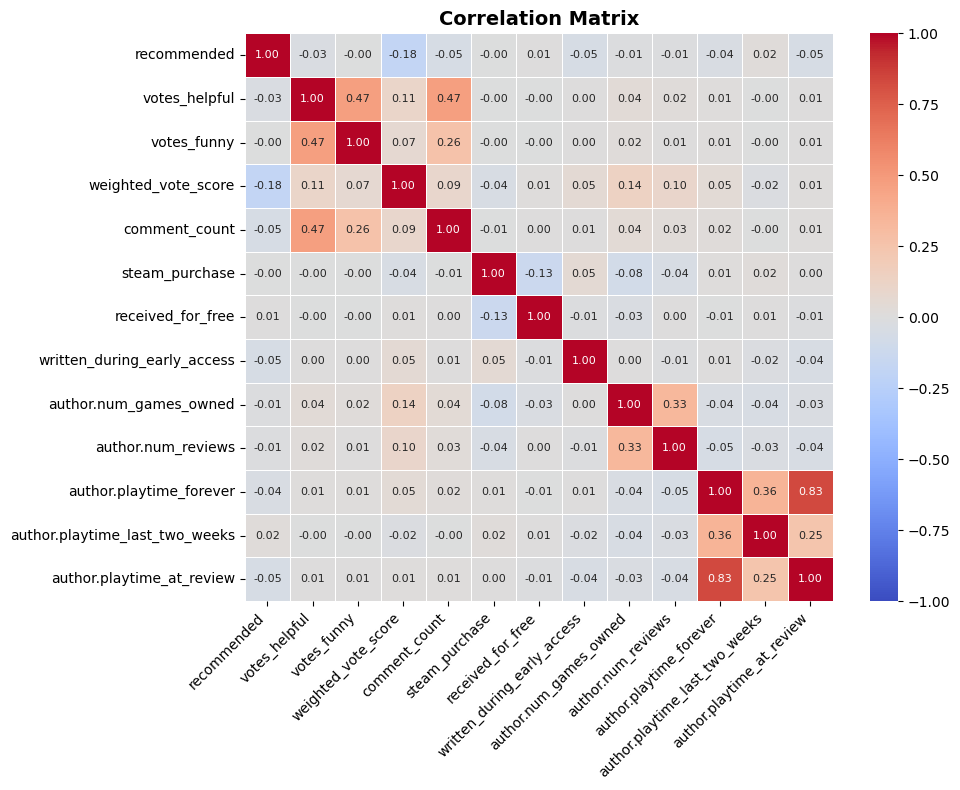

In [18]:
plt.figure(figsize=(10, 8))  
sns.heatmap(
    df_filtered.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",      
    vmin=-1, vmax=1,      
    linewidths=0.5,       
    annot_kws={"size": 8})

plt.xticks(rotation=45, ha="right")            
plt.title("Correlation Matrix", fontsize=14,weight="bold")  
plt.tight_layout()                   
plt.show()

## Correlation Matrix Analysis

This correlation matrix displays the relationships between the different variables in the dataset, with values ranging from -1 to 1 indicating whether or not there is a negative correlation (less than 0) or a positive correlation (greater than 0), or neither. 
Here is an analysis of some correlations between the different variables:

- **Positive Correlations**:

    - `author.playtime_forever` and `author.playtime_at_review` show a strong positive correlation (**0.83**), indicating that the total playtime correlates well with the playtime at review, as expected.
    - `author.num_games_owned` and `author.num_reviews` have a moderate positive correlation (**0.33**), suggesting that users who own more games tend to leave more reviews.
    - `votes_funny` and `votes_helpful`: There is a moderate positive correlation (0.47), suggesting that reviews marked as funny are also likely to be found helpful. This could imply that humorous reviews tend to engage users more,        leading them to vote both "funny" and "helpful."
    - `votes_funny` and `comment_count`: There is a small positive correlation (0.26) indicates that funny reviews tend to attract more comments. This may suggest that humorous content sparks discussion or interaction among users.
    - `votes_helpful` and `comment_count`: There is a moderate positive correlation (0.47), suggesting that if a review had receive a high number of helpful votes, it may indicate that users find it informative or insightful. This can lead to more players commenting on the review to discuss their own experiences, ask questions, or provide additional insights about the game.

- **Negative Correlations**:

    - `written_during_early_access` and `author.num_games_owned` show a moderate negative correlation (**-0.26**), implying that users who participate in early access reviews may own fewer games on average.
    - `written_during_early_access` and `author.playtime_forever` also have a moderate negative correlation (**-0.26**), which could indicate that early access reviewers might have lower total playtime as expected.

- **Weak or Near-Zero Correlations**:

    - Binary variables like `steam_purchase` and `received_for_free` show very weak correlations with other features, which may indicate that whether a game was purchased or received for free has little impact on other user.


## Number of reviews by year analysis

In [19]:
def get_year(date):
    return date.year 

In [20]:
# select specif columns of dataset 
time_review_df=df[['timestamp_created',"review"]]
time_review_df

,timestamp_created,review
0,2021-01-23 06:00:29,不玩此生遗憾，RPG游戏里的天花板，太吸引人了
1,2021-01-23 05:50:30,拔DIAO无情打桩机--杰洛特!!!
2,2021-01-23 05:46:40,巫师3NB
3,2021-01-23 05:32:50,"One of the best RPG's of all time, worthy of a..."
4,2021-01-23 05:23:47,大作
...,...,...
21747371,2020-03-23 18:05:04,Holy balls
21747372,2020-03-23 18:04:53,"A tripod thing bears down on you, it looks imm..."
21747373,2020-03-23 18:04:33,Honestly this is the best vr game ever
21747374,2020-03-23 18:03:51,Smooth turning is not working right now.\nIt a...


In [21]:
time_review_df['timestamp_created'].max()  # Time data goes up to January 21, 2021

Timestamp('2021-01-23 18:24:47')

In [22]:
time_review_df = time_review_df.rename(columns={'timestamp_created': "year"})
time_review_df

,year,review
0,2021-01-23 06:00:29,不玩此生遗憾，RPG游戏里的天花板，太吸引人了
1,2021-01-23 05:50:30,拔DIAO无情打桩机--杰洛特!!!
2,2021-01-23 05:46:40,巫师3NB
3,2021-01-23 05:32:50,"One of the best RPG's of all time, worthy of a..."
4,2021-01-23 05:23:47,大作
...,...,...
21747371,2020-03-23 18:05:04,Holy balls
21747372,2020-03-23 18:04:53,"A tripod thing bears down on you, it looks imm..."
21747373,2020-03-23 18:04:33,Honestly this is the best vr game ever
21747374,2020-03-23 18:03:51,Smooth turning is not working right now.\nIt a...


In [23]:
# apply get_year function in year column 
time_review_df["year"]=time_review_df["year"].apply(get_year)

In [24]:
time_review_df["year"]

0           2021
1           2021
2           2021
3           2021
4           2021
            ... 
21747371    2020
21747372    2020
21747373    2020
21747374    2020
21747375    2020
Name: year, Length: 21687945, dtype: int64

## Count the number of reviews for each year

In [25]:
# Group the DataFrame time_review_df by year and count the number of reviews for each year
time_review = time_review_df.groupby("year")["review"].size()

# Reset the index to convert the resulting Series into a DataFrame
# The year becomes a normal column and the count of reviews is renamed 'count'
time_review = time_review.reset_index(name='count')
time_review

,year,count
0,2010,2348
1,2011,30771
2,2012,47487
3,2013,197767
4,2014,691218
5,2015,915878
6,2016,1676175
7,2017,2680833
8,2018,2887143
9,2019,4134903


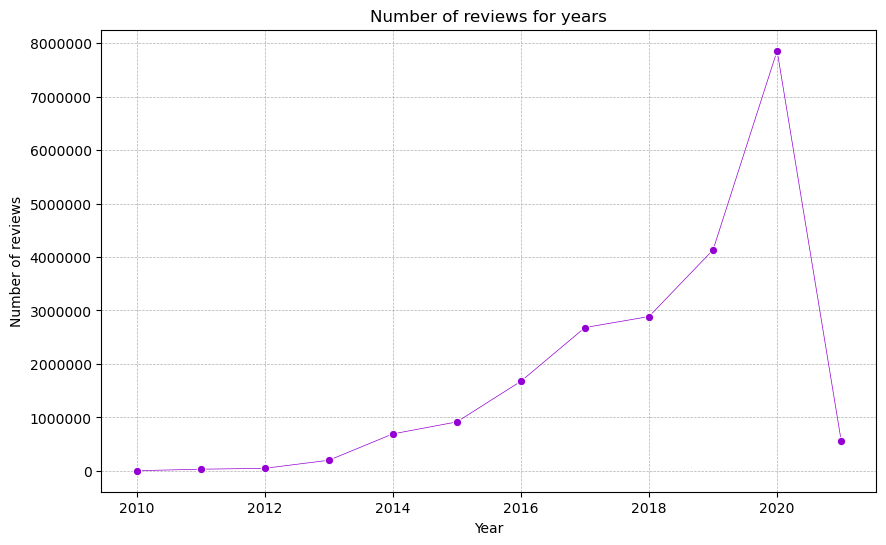

In [26]:
# Plot the trend of number of reviews for each year

plt.figure(figsize=(10,6))
sns.lineplot(data=time_review, x="year", y='count', color="darkviolet", marker="o",linewidth=0.5)

plt.title('Number of reviews for years')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.ticklabel_format(axis="y",style="plain")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

## Analysis reviews count trends from 2010 to 2021

- The graph illustrates review counts from 2010 to 2021, highlighting significant trends over this time period. Initially, the number of reviews was quite low, with less than 50,000 reviews recorded between 2010 and 2012 with a low of 2348 in 2010. This number began to grow dramatically between 2013 and 2016, culminating in a peak of 1,676,175 reviews by 2016;

- Following this trend, there was a continued increase in review counts, particularly in 2019, when the total surpassed 4 million reviews. The most important  information in the line chart is the peak of reviews reached in 2020, when the number of reviews by Steam users rose to nearly 8 million.This surge indicates a substantial increase in user engagement, possibly influenced by external factors such as the COVID-19 pandemic, which drove more people to share their experiences online;

- From the graph, it appears there was a drop in the number of reviews in 2021, but the data stops at **January 23, 2021**, at which point 563,197 reviews had been recorded, which is not bad.

## App names based on last played time 

In [27]:
df["author.last_played"].value_counts()

author.last_played
1970-01-02 00:00:00    2228
2013-03-30 07:00:00      96
2013-04-02 07:00:00      96
2013-04-01 07:00:00      94
2013-03-31 07:00:00      94
                       ... 
2020-12-07 08:13:10       1
2020-12-14 17:16:39       1
2020-12-11 23:43:28       1
2020-12-09 19:38:41       1
2020-10-16 14:12:23       1
Name: count, Length: 15973404, dtype: int64

In [28]:
df[["app_name","author.last_played"]].loc[df["author.last_played"]==df["author.last_played"].max()] 

,app_name,author.last_played
21746605,Half-Life: Alyx,2021-01-23 20:35:42


<img src="https://shared.akamai.steamstatic.com/store_item_assets/steam/apps/546560/capsule_616x353.jpg" width="400"/>

**Half-Life: Alyx**: Released on March 23, 2020, is a virtual reality (VR) first-person shooter. 

In [29]:
df[["app_name", "author.last_played"]].loc[df['author.last_played'] == df['author.last_played'].min()]

,app_name,author.last_played
3226433,Takedown: Red Sabre,1970-01-01
9668507,Undertale,1970-01-01
10358093,Dead Cells,1970-01-01
10358094,Dead Cells,1970-01-01
10358138,Dead Cells,1970-01-01
10359026,Dead Cells,1970-01-01
10359199,Dead Cells,1970-01-01
10362104,Dead Cells,1970-01-01
10363027,Dead Cells,1970-01-01
10364433,Dead Cells,1970-01-01


<img src="https://imgcdn.agendadigitale.eu/wp-content/uploads/2020/07/14155539/undertale.jpg" alt="Undertale" width="400"/> <img src="https://shared.fastly.steamstatic.com/store_item_assets/steam/apps/588650/capsule_616x353.jpg" width="400"/><img src="https://shared.cloudflare.steamstatic.com/store_item_assets/steam/apps/236510/capsule_616x353.jpg" width="400"/>

- **Undertale** : Released on Sep 15, 2015, is an RPG (role-playing game);
- **Dead Cells** : Released on Aug 7, 2018, is an Action-Adventure Roguelike;
- **Takedown: Red Sabre** : Released on Dec 12, 2013, is a Tactical Shooter. 

**The previous three videogames were released after 1970. There was probably a problem in the conversion with `dateparse function` and they were assigned that date because their value before was 0. In fact, January 1, 1970 represents the starting point of the system of measuring time in numbers of seconds.** 

In [30]:
#To resolve this problem we can filter the 'author.last_played' column with the dates after than January 1, 2000 :

valid_entries_time = df.loc[(df['author.last_played'] > pd.Timestamp('2000-01-01'))]
df[["app_name", "author.last_played"]].loc[df['author.last_played'] == valid_entries_time['author.last_played'].min()]

,app_name,author.last_played
588847,Counter-Strike: Source,2007-02-04 08:00:00


<img src="https://shared.akamai.steamstatic.com/store_item_assets/steam/apps/240/header.jpg" width="400"/> 

**Counter-Strike: Source** : Released on Nov 1, 2004, is a Tactical shooter game
 


## Language and Review Analysis 

### View all languages of user-written reviews on the Steam gaming platform :

In [31]:
pd.unique(df.language)

array(['schinese', 'english', 'turkish', 'spanish', 'russian', 'koreana',
       'latam', 'brazilian', 'portuguese', 'vietnamese', 'polish',
       'french', 'german', 'hungarian', 'ukrainian', 'tchinese',
       'bulgarian', 'czech', 'italian', 'thai', 'greek', 'dutch',
       'finnish', 'romanian', 'japanese', 'swedish', 'danish',
       'norwegian'], dtype=object)

In [32]:
print(f"The number of different languages used in reviews on the Steam platform is: {len(pd.unique(df.language))}")

The number of different languages used in reviews on the Steam platform is: 28


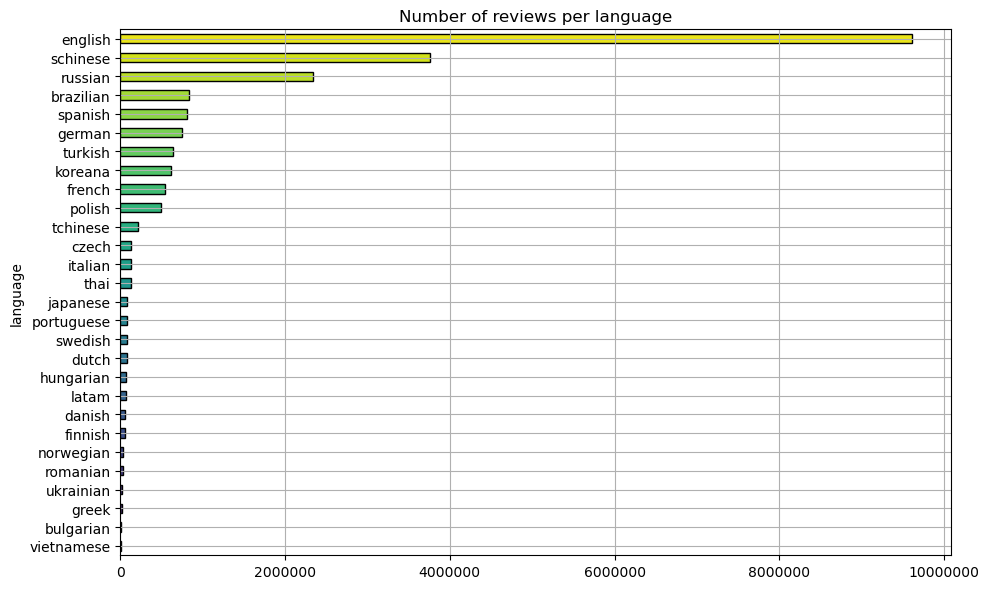

In [33]:
viridis = sns.color_palette("viridis",len(df.language.value_counts()))
plt.figure(figsize=(10,6))
df.language.value_counts().sort_values(ascending=True).plot.barh(
    width=0.5, 
    title="Number of reviews per language", 
    color=viridis,
    edgecolor="black"
)
plt.ticklabel_format(axis="x",style="plain")
plt.tight_layout()
plt.grid()
plt.show()

From the barplot in the figure, it can be seen that the largest number of reviews written by users in 2021 are in English followed by Chinese and Russian.A possible reason for the largest number of reviews in English, followed by Chinese and Russian, could be the global prevalence of these languages among internet users. English remains the most widely used language online, enabling a larger base of users to engage with content and share reviews. Similarly, Chinese and Russian have large native-speaking populations, many of whom increasingly participate in global and local online platforms, contributing significantly to review counts. Additionally, these languages are commonly used on major review platforms, which may encourage users to write reviews in their native or most commonly used language.

In [34]:
top3_languages=df.language.value_counts().index[:3]
top3_languages # save the top three index in one variable called top3_languages

Index(['english', 'schinese', 'russian'], dtype='object', name='language')

In [35]:
language= df["language"].copy() # define a copy of language column
# Replaces values in 'language' that are NOT in 'top3_languages' with "other languages"
language.loc[~language.isin(top3_languages)] = "other languages"
language.value_counts()

language
english            9606838
other languages    5980058
schinese           3758221
russian            2342828
Name: count, dtype: int64

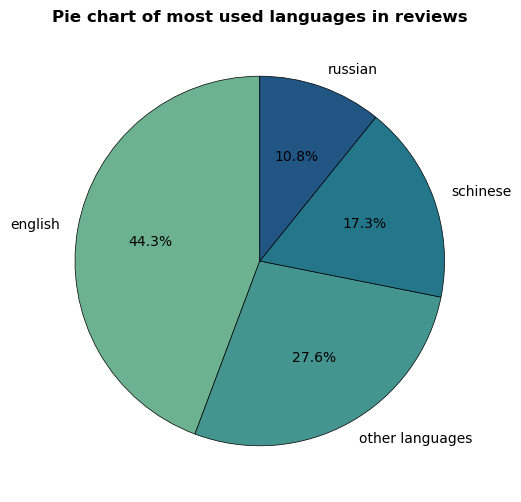

In [36]:
# Create a pie chart to visualize the percentage distribution of languages in the dataset
plt.figure(figsize=(6, 6))
plt.pie(language.value_counts(), labels=language.value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest", len(language.value_counts())),
         wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title('Pie chart of most used languages in reviews',fontsize=12, fontweight='bold')
plt.show()

This pie chart shows the distribution of languages used in reviews. English dominates with 44.3% of all reviews, making it the most used language in reviews as highlighted in the previous chat bar, followed by Chinese and Russian with significantly lower percentages. Other languages occupy a good percentage of the distribution at 27.6%. **Given the large influx of English into the dataset, we can continue the analysis only on that language to reduce the memory space in future data manipulation**.

## Playtime distribution of Steam users

In [37]:
hour=3600  # in terms of second one hour is composed 3600 seconds
playtime_intervals = [0,hour*3,hour*6,hour*12, hour*24, float('inf')]  # let's define some intervals
playtime_names = ['Less than 3 hours','3-6 hours','6-12 hours', '12-24 hours', '1+ days']  # define the names of intervals based by hours that player played 
playtime_df = pd.cut(df['author.playtime_forever'], bins=playtime_intervals, labels=playtime_names, right=True)

In [38]:
playtime_counts=playtime_df.value_counts()
playtime_counts

author.playtime_forever
Less than 3 hours    14976088
3-6 hours             2612766
6-12 hours            2015197
12-24 hours           1307504
1+ days                776378
Name: count, dtype: int64

In [39]:
# Show the percentages
for value,index in zip(playtime_counts,playtime_counts.index):
    print(f"{index}: {value/sum(playtime_counts) * 100:.2f}%")
    

Less than 3 hours: 69.05%
3-6 hours: 12.05%
6-12 hours: 9.29%
12-24 hours: 6.03%
1+ days: 3.58%


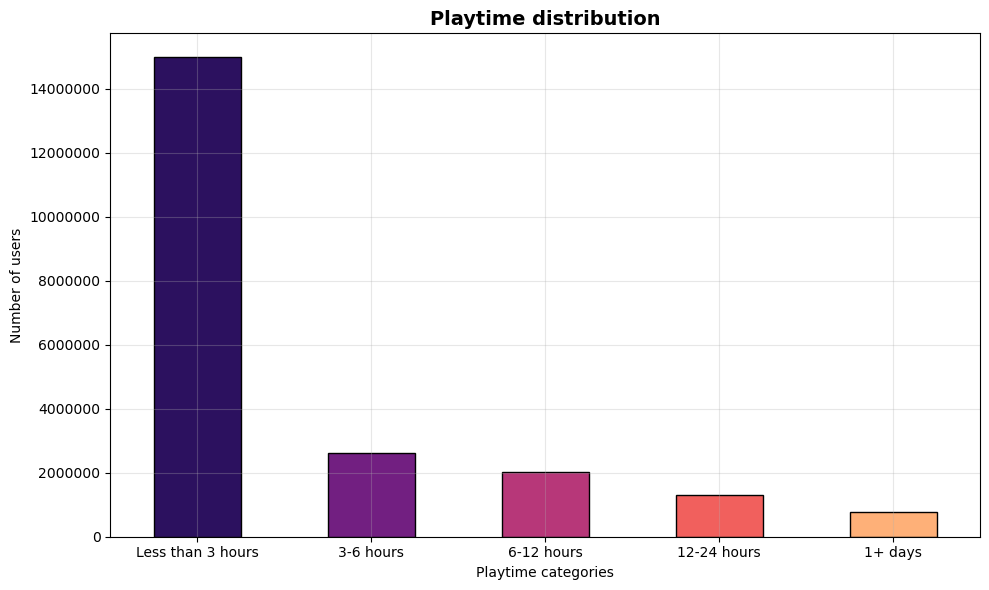

In [40]:
magma=sns.color_palette("magma", 5)
plt.figure(figsize=(10, 6))

playtime_df.value_counts().plot.bar(color=magma, edgecolor='black')

plt.xlabel('Playtime categories')
plt.ylabel('Number of users')
plt.ticklabel_format(axis="y",style="plain")
plt.title('Playtime distribution',fontsize=14,weight="bold")
plt.xticks(rotation=360)  
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Playtime distribution analysis: 
The distribution bar chart shows a large predominance in the number of users who play for short sessions: 
- Approximately 15 million people dedicate less than 3 hours to the game, representing the highest segment. 
- A drastic drop is then noted in the subsequent bands, with approximately 2.6 million users who play between 3-6 hours, followed by a gradual decline through the 6-12 hour categories (2 million), 12-24 hour categories (1.3 million), until reaching approximately 800,000 users who play for more than a day. 
## Considerations:
- This distribution suggests that the Steam platform is mainly dominated by a casual audience, with a modest player base investing longer periods in their gaming sessions.
- The high number of gamers who play for short sessions could represent the segment of people with limited gaming time, such as students or workers who seek short but frequent moments of leisure.
- Analysis of play time can be influenced by seasonal trends, with peaks during holidays, weekends, or when new games or a new updates are launched.

## Analysis of Playtime and Game Recommendations

In [41]:
# Let's see if there is a connection between the hours played and whether the game is recommended or not
recommendations_playtime=pd.concat([playtime_df,df["recommended"]],axis=1)  # union two column of different data

# show the table
recommendations_playtime

,author.playtime_forever,recommended
0,Less than 3 hours,True
1,Less than 3 hours,True
2,Less than 3 hours,True
3,Less than 3 hours,True
4,Less than 3 hours,True
...,...,...
21747371,Less than 3 hours,True
21747372,Less than 3 hours,True
21747373,Less than 3 hours,True
21747374,Less than 3 hours,True


In [42]:
# Grouping the DataFrame 'recommendations_playtime' by the 'recommended' column
# This separates the data into two groups: those who recommended (True) and those who did not (False)

groupby_recommendations = recommendations_playtime.groupby(['recommended','author.playtime_forever']).value_counts().unstack()
groupby_recommendations.sort_index(ascending=False)

author.playtime_forever,Less than 3 hours,3-6 hours,6-12 hours,12-24 hours,1+ days
recommended,,,,,
True,13272291,2296279,1695215,1065347,639507
False,1703797,316487,319982,242157,136871


## Considerations
- As highlighted in the correlation matrix, there is no significant correlation between the hours played and whether the game is recommended or not. This information suggests that the amount of time a player spends in the game does not necessarily influence their likelihood of recommending it to others.

- It is important to note that while players may invest many hours into a game, this does not automatically translate into a positive recommendation. Factors such as individual preferences, expectations, and experiences with the game's mechanics, narrative, or other factos can all play a crucial role in shaping a player's overall perception.

## Number of videogames owned per Steam utent 

In [43]:
number_videogames_owned=df["author.num_games_owned"].value_counts().sort_values(ascending=False)

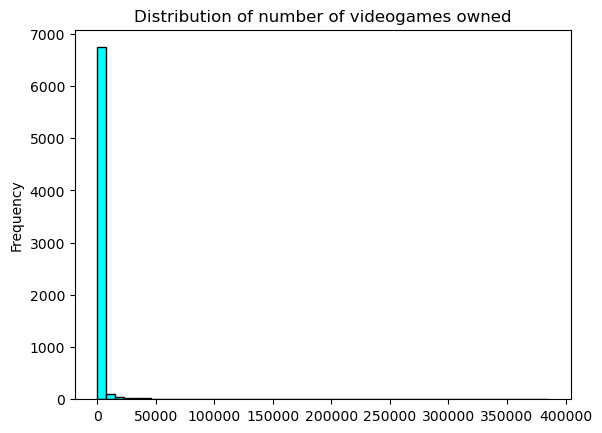

In [44]:
number_videogames_owned.plot.hist(color="aqua",edgecolor="black",bins=50,title="Distribution of number of videogames owned")
plt.show()

#### The first histogram with all the data relating to the number of games owned by Steam users shows that most of them own very few games, with some outliers owning a very high number.

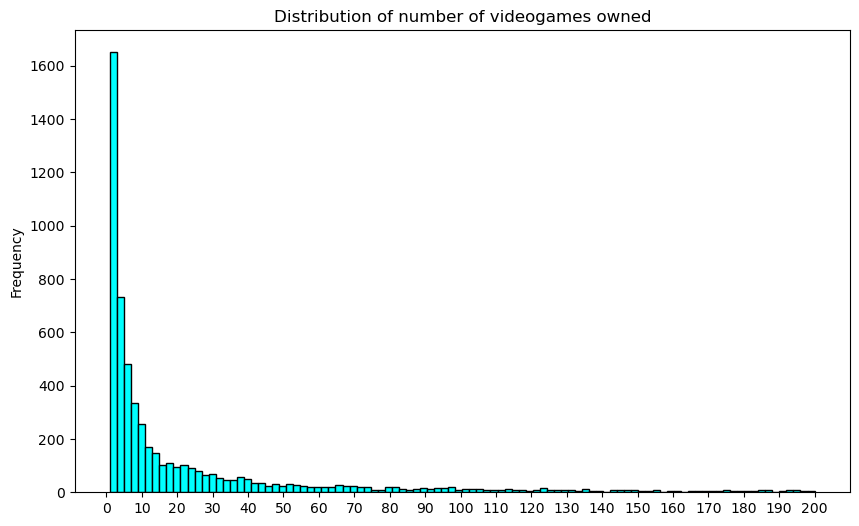

In [45]:
# Focus on users with 200 or fewer games owned to improve visualization and remove possible outliers

fig= number_videogames_owned.loc[number_videogames_owned<=200].plot.hist(color="aqua",edgecolor="black",bins=100,title="Distribution of number of videogames owned",figsize=(10,6))
fig.set_xticks(range(0, 201, 10)) # Divide into intervals of 10, making it easier to interpret the frequency 
plt.show()

The histogram illustrates the distribution of the number of videogames owned by users, focusing on those with 200 or fewer games.

- The distribution is highly skewed to the left, with the majority of users owning a small number of games. Especially a significant number of users own fewer than 10 games.
- As the number of games owned increases, the frequency **decreases rapidly**, showing that only a small proportion of users own a larger collection of these.

### **We create different categories of users based on the games they own in their Steam library**

In [46]:
bins = [1, 10, 20, 51, 201, float('inf')]  
Gamer_categories = ['Occasional', 'Casual Gamer', 'Moderate Gamer', 'Passionate Gamer', 'Collector']  

In [47]:
df['game_category'] = pd.cut(df['author.num_games_owned'], bins=bins, labels=Gamer_categories, right=True)
category_counts = df['game_category'].value_counts()

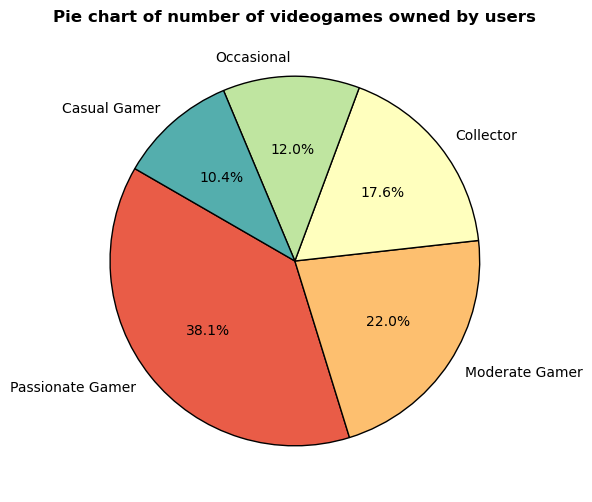

In [48]:
Spectral=sns.color_palette("Spectral",5)
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=150, colors=Spectral,wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Pie chart of number of videogames owned by users',fontsize=12, fontweight='bold')
plt.show()

## User Distribution Analysis by Game Ownership

The pie chart illustrates the distribution of Steam users by the number of games they own. **Users are divided into five distinct groups:**

- **Passionate Gamer (201+ games):** This is the largest category, comprising 38.1% of users. Avid gamers are likely to have a strong dedication to gaming, amassing a sizeable collection of games. This group may consist of users who are frequently active on the platform, who purchase and play a wide variety of games, such as streamers, YouTubers, and content creators from other platforms.

- **Moderate Gamer (51-200 games):** The second largest group, comprising 22% of the user base, is likely to consist of gamers who enjoy gaming but have a small library. They may be selective in their purchases, purchasing only games they are particularly interested in.

- **Collector (21-50 games):** The third group includes 17.6% of users who focus on building as large a game library as possible. They may not necessarily play all games extensively, but they enjoy accumulating games, perhaps out of interest in building a collection or taking advantage of discounts on the platform.

- **Occasional Gamer (11-20 games):** This group, representing 12.4% of users, likely represents individuals who play games sporadically. Occasional gamers may purchase games infrequently and play only occasionally, perhaps reflecting a more casual interest or limited play time.

- **Casual Gamer (1-10 games):** The smallest group, representing 10.4% of users, are casual gamers. These users likely have a minimal collection of games and interact with the platform infrequently, using it primarily for occasional entertainment.

### Considerations

The chart shows a broad level of user activity on Steam, with nearly 60% of users classified as either passionate or moderate gamers. This suggests that a significant portion of the user base is heavily engaged in gaming, while smaller segments use the platform more casually.


# [RQ2] Let's explore the dataset by analyzing the distribution of reviews across different applications

## 1. Identify which applications have the highest and lowest number of reviews

In [49]:
best_selling_games=df["app_name"].value_counts().sort_values(ascending=False)[:10]
worst_selling_games=df["app_name"].value_counts().sort_values(ascending=True)[:10]

In [50]:
print(best_selling_games)

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     1642631
Grand Theft Auto V                1016370
Tom Clancy's Rainbow Six Siege     839838
Terraria                           671425
Garry's Mod                        653815
Rust                               548020
Rocket League                      497249
PAYDAY 2                           486110
Among Us                           483393
The Witcher 3: Wild Hunt           468330
Name: count, dtype: int64


In [51]:
worst_selling_games

app_name
Neon Hardcorps                      197
DRAGON QUEST HEROES™ II             599
Out of the Park Baseball 19         699
Shadow Complex Remastered           699
Don't Escape: 4 Days to Survive    1011
Slipstream                         1101
Toukiden 2                         1199
Budget Cuts                        1295
WWE 2K17                           1496
Rapture Rejects                    1598
Name: count, dtype: int64

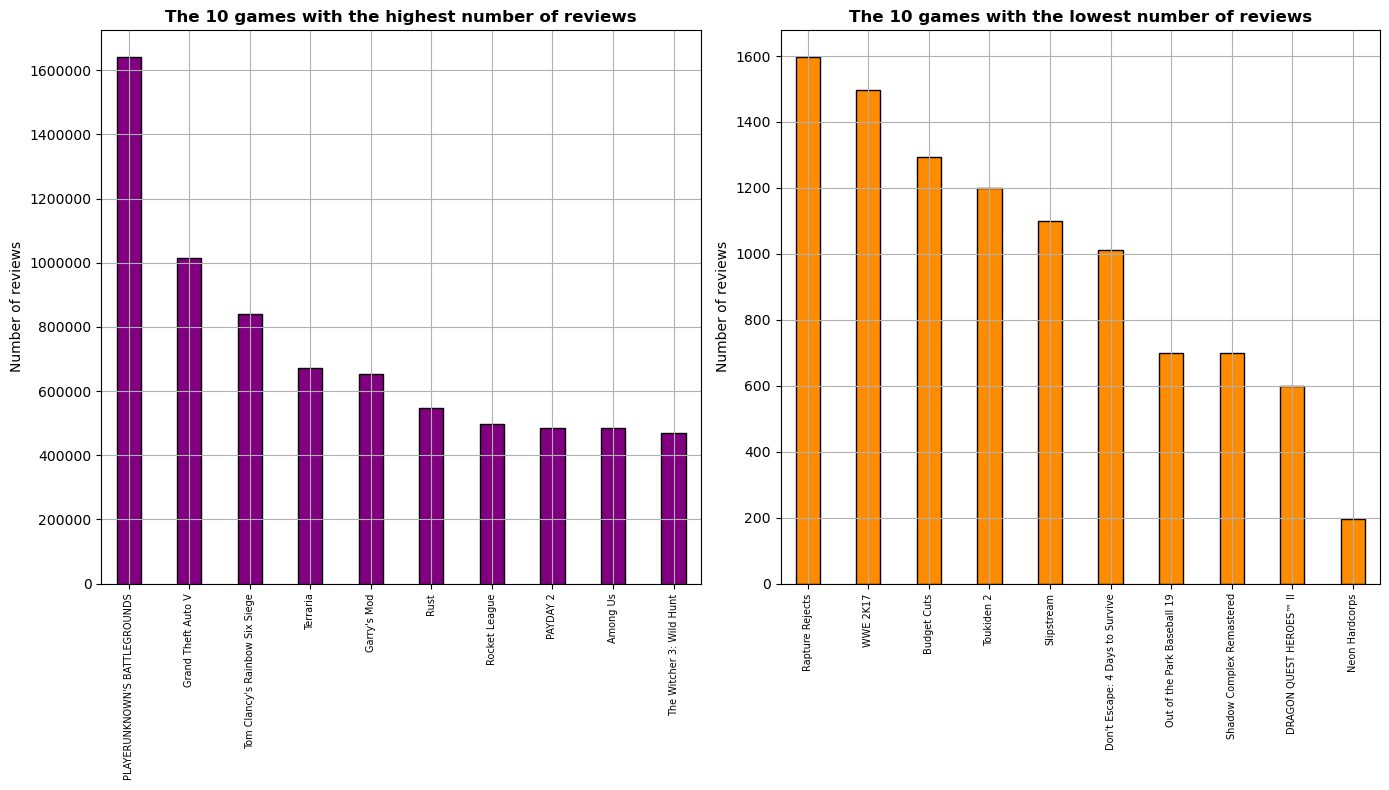

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
best_selling_games[:10].plot.bar(y='Number of reviews', ax=axs[0], color='purple',edgecolor="black",width=0.4)
axs[0].set_title("The 10 games with the highest number of reviews",weight="bold")
axs[0].tick_params(axis='x', labelsize=7)
axs[0].set_xlabel("")
axs[0].set_ylabel('Number of reviews')
axs[0].ticklabel_format(axis="y",style="plain")
axs[0].grid()

worst_selling_games.sort_values(ascending=False).plot.bar(y='Number of reviews', ax=axs[1], color='darkorange',edgecolor="black",width=0.4)
axs[1].set_title("The 10 games with the lowest number of reviews",weight="bold")
axs[1].tick_params(axis='x', labelsize=7)
axs[1].set_xlabel("")
axs[1].set_ylabel('Number of reviews')
axs[1].grid()  

plt.tight_layout()
plt.show()

In [53]:
app_review_count = df["app_name"].value_counts()

app_max_review = app_review_count.idxmax()
max_reviews = app_review_count.max()

app_min_review = app_review_count.idxmin()
min_reviews = app_review_count.min()

print(f"The app with the highest number of reviews is: {app_max_review} with {max_reviews} reviews")
print(f"The app with the lowest number of reviews is: {app_min_review} with {min_reviews} reviews")

The app with the highest number of reviews is: PLAYERUNKNOWN'S BATTLEGROUNDS with 1642631 reviews
The app with the lowest number of reviews is: Neon Hardcorps with 197 reviews


## 2. Plot the number of reviews for each application in descending order. What insights can you draw from the plot?

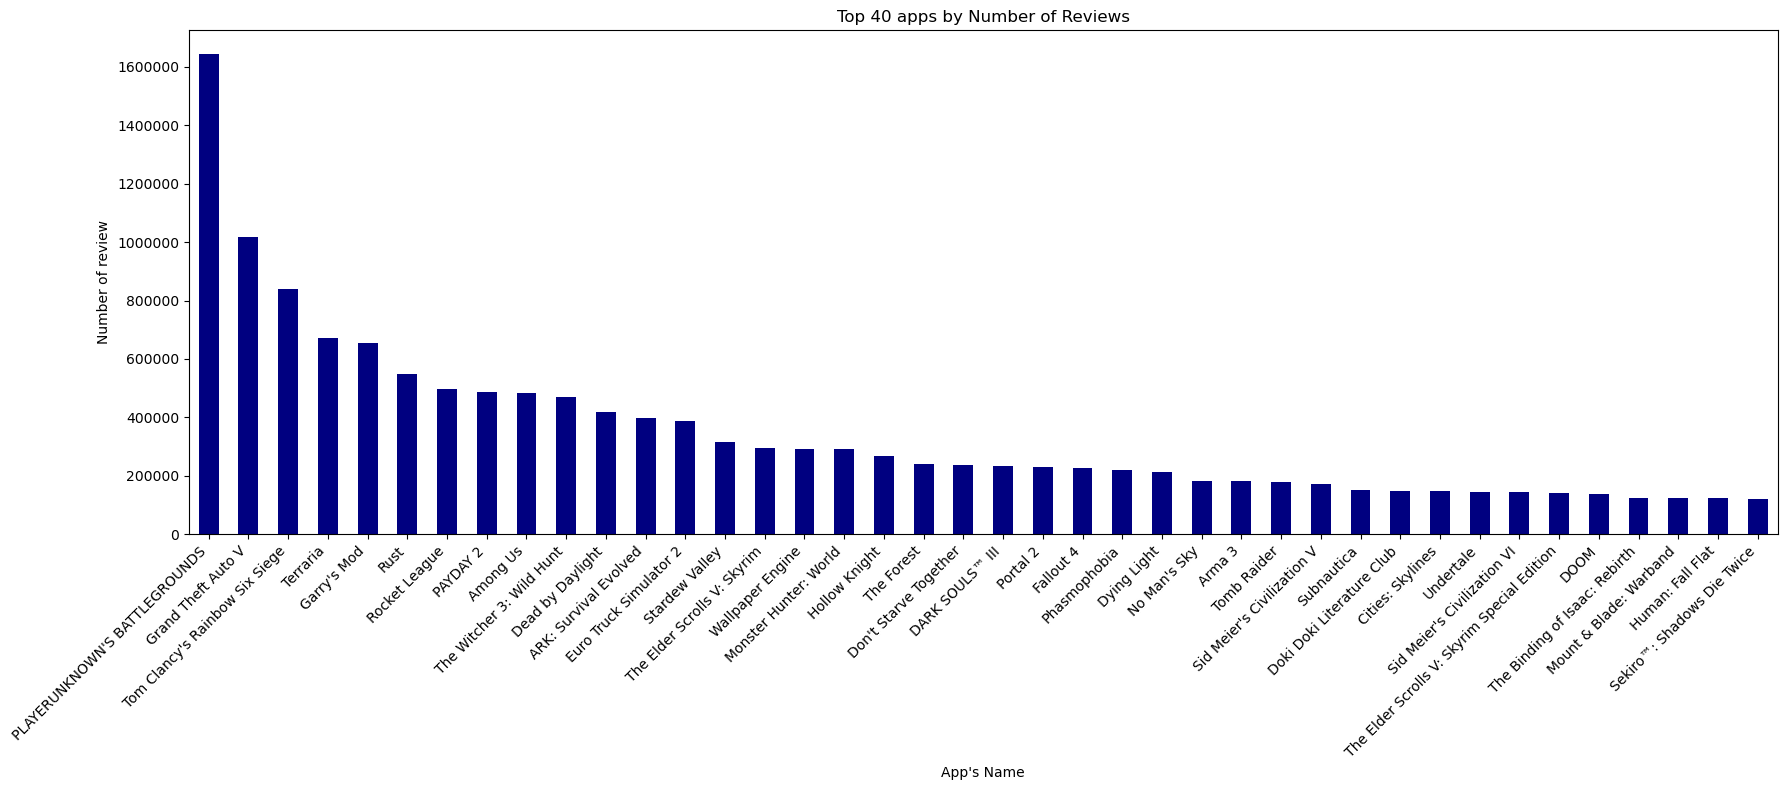

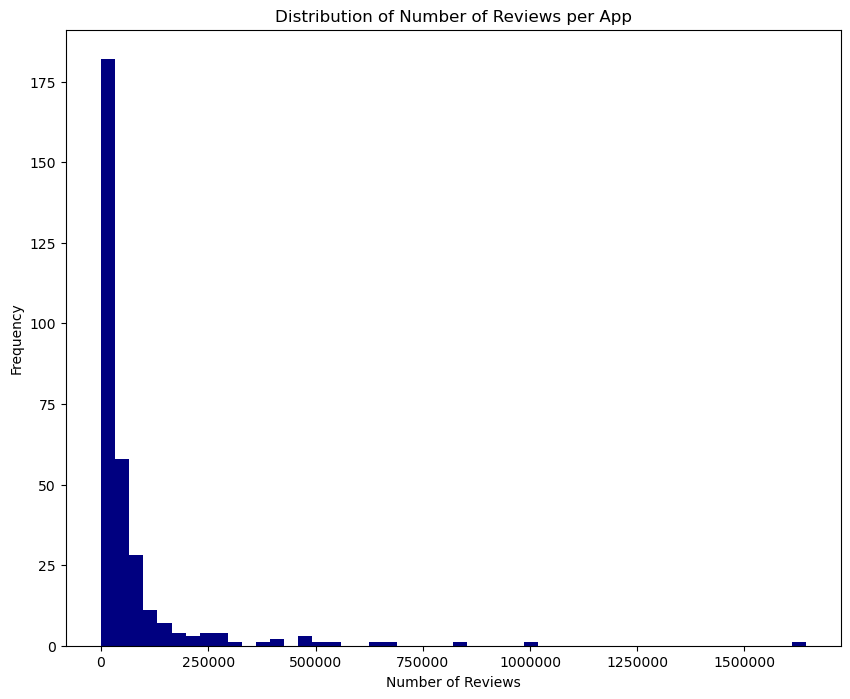

In [54]:
# We have 315 applications, and representing them all together while keeping the chart readable would not be feasible. 
# Therefore, we will represent only the top 40 applications in the first chart. 
n_apps=40
top_n_apps = app_review_count.head(n_apps)
top_n_apps.plot(kind='bar', figsize=(18, 8), color='#000080')
plt.title(f"Top {n_apps} apps by Number of Reviews")
plt.xlabel("App's Name")
plt.ylabel("Number of review")
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()

#To give an overall idea, we will also represent the frequency distribution of the number of reviews.
app_review_count.plot(kind='hist', bins=50, color='#000080', figsize=(10, 8))
plt.title("Distribution of Number of Reviews per App")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.ticklabel_format(axis='x', style='plain')
plt.show()

## Distribution analysis
The distribution of the number of reviews of videogames on the Steam platform is characterized is characterized by a long-tail type of distribution that shows that most games have a relatively small audience, while only a few titles, such as "PlayerUnknown's Battlegrounds", "Grand Theft Auto V" and "Rainbow Six Siege", reach very high levels of popularity. Also, from the graph, we can see that only a handful of games have an exceptionally high number of reviews, while most apps have far fewer,for example the number of reviews for the game "PlayerUnknown's Battlegrounds" seems to be an outlier compared to other games.

## Considerations 
The success of online multiplayer games such as "PlayerUnknown's Battlegrounds" likely stems from their competitive nature, combined with the growth of the gaming industry during the COVID-19 pandemic, when people sought virtual social interactions and entertainment while staying at home. Furthermore, the gap between games with the highest and lowest number of reviews suggests that factors such as online multiplayer options, cross-platform availability, and frequent updates play a crucial role in driving commercial success.

## 3. For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.

In [55]:
top_5_apps = app_review_count.head(5)
df_top_5_apps=df[df['app_name'].isin(top_5_apps.index)]
#Analyzing the dataset, we realize that the fields 'received_for_free' and 'steam_purchase' are not mutually exclusive. To avoid skewing the numbers, we need to clean the data to ensure exclusivity between these two fields.
df_top_5_apps = df_top_5_apps[~((df_top_5_apps['steam_purchase'] == True) & (df_top_5_apps['received_for_free'] == True) | (df_top_5_apps['steam_purchase'] == False) & (df_top_5_apps['received_for_free'] == False))]
n_review = len(df_top_5_apps)
n_review_free_app_perc = round(len(df_top_5_apps[df_top_5_apps['received_for_free']])/n_review *100,2)
n_review_buy_app_perc = round(len(df_top_5_apps[df_top_5_apps['steam_purchase']])/n_review *100,2)
print(f"Reviews from users who received the game as a gift: {n_review_free_app_perc}%\nReviews from users who purchased the game on steam: {n_review_buy_app_perc}%")

# We calculate the percentage of reviews for each of the top 5 apps to see if there are similarities among them and if they differ from the total.
percentages = df_top_5_apps.groupby('app_name').apply(
    lambda app: pd.Series({
        'percent_free': len(app[app['received_for_free']]) / len(app) * 100,
        'percent_purchased': len(app[app['steam_purchase']]) / len(app) * 100
    })
)
print(percentages)

df_top_5_apps.head()
#We note that all 5 apps have similar percentages of reviews among themselves.

Reviews from users who received the game as a gift: 1.38%
Reviews from users who purchased the game on steam: 98.62%
                                percent_free  percent_purchased
app_name                                                       
Garry's Mod                         1.340376          98.659624
Grand Theft Auto V                  0.758890          99.241110
PLAYERUNKNOWN'S BATTLEGROUNDS       1.325592          98.674408
Terraria                            1.807771          98.192229
Tom Clancy's Rainbow Six Siege      1.983516          98.016484


,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,game_category
907627,4000,Garry's Mod,85009532,english,"great game, just dont leave then game for like...",2021-01-20 02:39:41,2021-01-20 02:39:41,True,0,0,...,False,False,1119118279,11,3,6632.0,240.0,6618.0,2021-01-20 02:54:59,Casual Gamer
907629,4000,Garry's Mod,85009374,english,sssss,2021-01-20 02:35:03,2021-01-20 02:35:03,True,0,0,...,False,False,1078694213,5,2,9518.0,15.0,9518.0,2021-01-20 02:34:41,Occasional
907630,4000,Garry's Mod,85009235,russian,FepFep,2021-01-20 02:31:07,2021-01-20 02:31:07,False,0,0,...,False,False,210684850,45,2,152235.0,1480.0,152235.0,2021-01-20 00:25:30,Moderate Gamer
907631,4000,Garry's Mod,85009000,english,I have over 600 mods.,2021-01-20 02:23:37,2021-01-20 02:23:37,True,0,0,...,False,False,146820107,327,37,60448.0,36.0,60448.0,2021-01-16 00:50:51,Collector
907632,4000,Garry's Mod,85008994,english,chad.,2021-01-20 02:23:19,2021-01-20 02:23:19,True,0,0,...,False,False,1034994384,6,2,386.0,16.0,386.0,2021-01-20 02:20:30,Occasional


## 4. Which applications have the most and the least user recommendations? Summarize your findings.

In [56]:
app_recommendation_count = df.groupby('app_name')['recommended'].sum()
top_3_most_recommended = app_recommendation_count.nlargest(3)
top_3_least_recommended = app_recommendation_count.nsmallest(3)

print("The 3 apps with the highest number of recommendations are:")
for app, count in top_3_most_recommended.items():
    print(f"{app}: {count} recommendations")
    
print("\nThe 3 apps with the lowest number of recommendations are:")
for app, count in top_3_least_recommended.items():
    print(f"{app}: {count} recommendations")

The 3 apps with the highest number of recommendations are:
PLAYERUNKNOWN'S BATTLEGROUNDS: 885189 recommendations
Grand Theft Auto V: 828901 recommendations
Tom Clancy's Rainbow Six Siege: 740479 recommendations

The 3 apps with the lowest number of recommendations are:
Neon Hardcorps: 88 recommendations
DRAGON QUEST HEROES™ II: 423 recommendations
Identity: 439 recommendations


In [57]:
#We immediately notice that the apps with the most recommendations are also those with the highest number of reviews.
# We can try to normalize the number of recommendations by dividing by the number of reviews (calculated in Q1) for each app, and we’ll observe that the result changes.
app_recommendation_ratio=pd.merge(app_recommendation_count.reset_index(),app_review_count.reset_index(), how='inner', on='app_name')
app_recommendation_ratio['recommended_ratio']=app_recommendation_ratio.loc[:,'recommended']/app_recommendation_ratio.loc[:,'count']
app_recommendation_ratio = app_recommendation_ratio.set_index('app_name')['recommended_ratio']

top_3_most_recommended = app_recommendation_ratio.nlargest(3)
top_3_least_recommended = app_recommendation_ratio.nsmallest(3)

print("The 3 apps with the highest number of recommendations are:")
for app, count in top_3_most_recommended.items():
    print(f"{app}: {round(count*100,2)}% recommendations")

print("\nThe 3 apps with the lowest number of recommendations are:")
for app, count in top_3_least_recommended.items():
    print(f"{app}: {round(count*100,2)}% recommendations")

The 3 apps with the highest number of recommendations are:
ULTRAKILL: 99.53% recommendations
Senren＊Banka: 99.4% recommendations
A Short Hike: 99.14% recommendations

The 3 apps with the lowest number of recommendations are:
Identity: 24.43% recommendations
RollerCoaster Tycoon World: 24.47% recommendations
SOS: 27.86% recommendations


### 5. Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.

In [58]:
#The data of interest do not follow a normal distribution, so we will use Spearman's correlation.
# Spearman measures the correlation between the ranks of the variables rather than their raw values, making it less sensitive to non-normality and outliers.

grouped_df = df.groupby('app_name').agg({
    'recommended': 'sum',
    'weighted_vote_score': 'mean'
}).reset_index()

corr, p_value = spearmanr(grouped_df['recommended'], grouped_df['weighted_vote_score'])

print("Spearman correlation:", corr)
print("p-value:", p_value)

if p_value < 0.05: print("The correlation is statistically significant.")
else: print("The correlation is NOT statistically significant.")

Spearman correlation: -0.625837451000718
p-value: 1.182368568550798e-35
The correlation is statistically significant.


### Interpretation of Results

- **Spearman Correlation**: The correlation value is **-0.6258**, indicating a moderate negative monotonic correlation. This suggests that as the number of recommendations increases, scores tend to decrease (or vice versa), although the relationship is not perfect.

- **p-value**: The p-value is **1.16e-35**, an extremely low number (much lower than 0.05), indicating that the observed correlation is statistically significant. Therefore, it is unlikely that this negative relationship is due to chance.

We can conclude that there is a significant negative correlation between the number of recommendations and the average game scores: as recommendations increase, scores tend to decrease, and this relationship is statistically relevant.

# [RQ3] Understanding when users are most active in submitting reviews can help identify peak engagement periods.

## 1. Plot the number of reviews submitted each month and describe any trends.
## 2. Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.

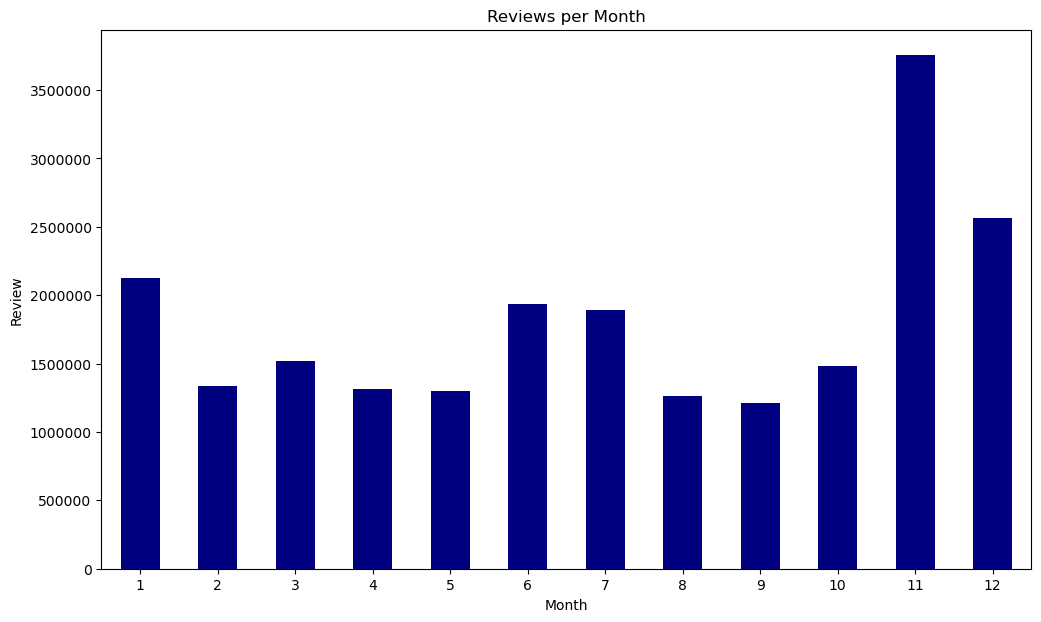

In [59]:
df['month'] = df['timestamp_created'].dt.month
month_review = df.groupby('month').size()
month_review.plot(kind='bar', figsize=(12,7), color='#000080')
plt.title("Reviews per Month")
plt.xlabel("Month")
plt.ylabel("Review")
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

## Monthly Review Trend Analysis

Observing the chart, we can identify the following seasonal trends:

**Significant Increase in Reviews in November and December**:  
   - A peak in reviews is observed during the months of November and December. This indicates a trend of users leaving more reviews during holiday periods, such as Black Friday, Cyber Monday, and the Christmas season, confirmed by the fact that many games are gifted or purchased due to substantial discounts during this time.

**Decrease in Reviews**:  
   - February, April, May, August, and September are the months with the fewest reviews.  
      - August has the lowest counts overall, as expected, being the quintessential vacation month, during which users are less active due to travel or the desire to engage in outdoor activities.


## 3. Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.

We hypothesized that user activity peaks might be correlated with specific events, such as holidays or discount periods, particularly around Black Friday and the Christmas holidays.
Let's check if these activity peaks actually correspond to these events.
Knowing that Black Friday is the Friday following Thanksgiving (which is the fourth Thursday in November) and that Christmas is on December 25, we would expect peaks in the last week of November and in the days following December 25.

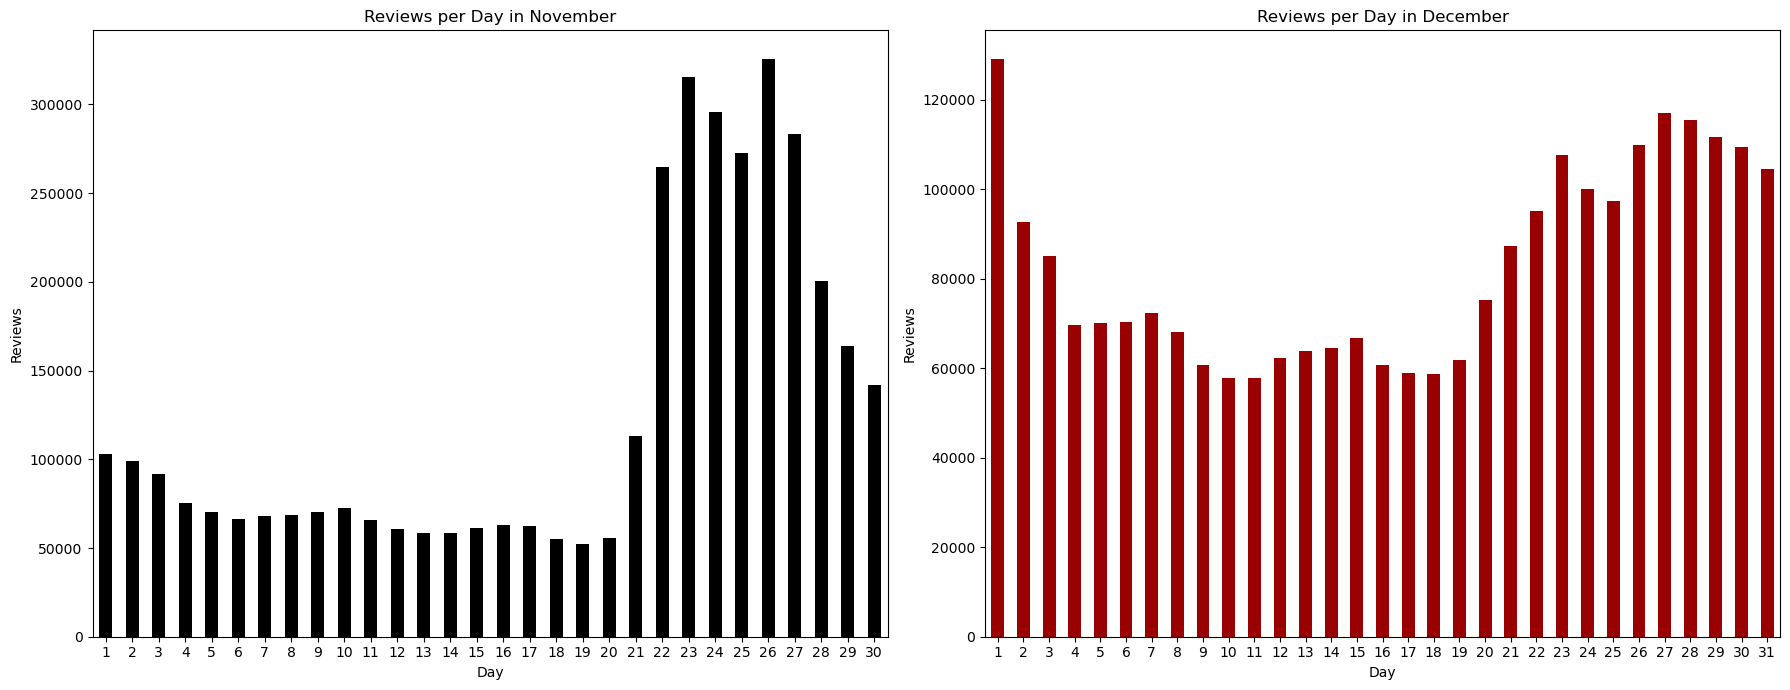

In [60]:
#November data
df_november = df[df['month'] == 11].copy()
df_november['day'] = df_november['timestamp_created'].dt.day
november_review = df_november.groupby('day').size()
#December data
df_december = df[df['month'] == 12].copy()
df_december['day'] = df_december['timestamp_created'].dt.day
december_reviews = df_december.groupby('day').size()
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
# November plot
november_review.plot(kind='bar', ax=axes[0], color='#000000')
axes[0].set_title("Reviews per Day in November")
axes[0].set_xlabel("Day")
axes[0].set_ylabel("Reviews")
axes[0].ticklabel_format(axis='y', style='plain')
axes[0].tick_params(rotation=0)
# December plot
december_reviews.plot(kind='bar', ax=axes[1], color='#990000')
axes[1].set_title("Reviews per Day in December")
axes[1].set_xlabel("Day")
axes[1].set_ylabel("Reviews")
axes[1].ticklabel_format(axis='y', style='plain')
axes[1].tick_params(rotation=0)

plt.tight_layout()
plt.show()
del df_november, df_december

As expected, we can observe that the peaks in reviews are caused by the massive purchase of games during the Black Friday period and around Christmas.

## 4. What is the most common time of day users write reviews? For example, users might typically write reviews at 17:44. Explain how this time distribution could influence your analysis.

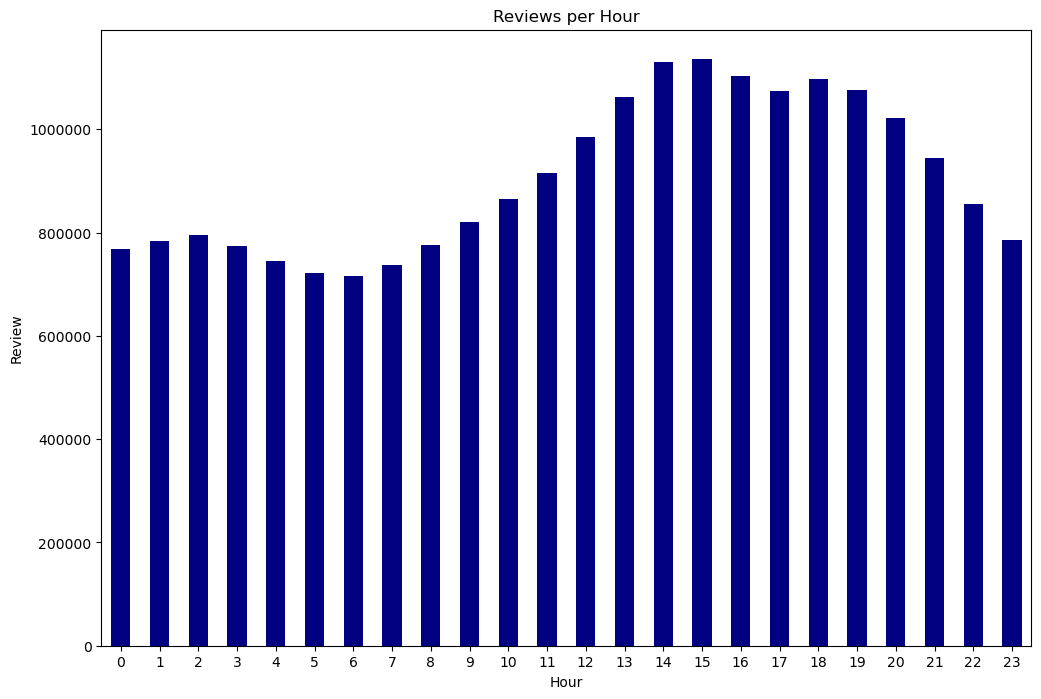

In [61]:
df['hour'] = df['timestamp_created'].dt.hour
hour_reviews = df.groupby('hour').size()
hour_reviews.plot(kind='bar', figsize=(12,8), color='#000080')
plt.title("Reviews per Hour")
plt.xlabel("Hour")
plt.ylabel("Review")
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

The time when users most frequently write reviews is between 2 p.m. and 7 p.m. One might assume that reviews written during this time are more likely to be positive.  
However, as we can see from the chart below, this is merely a hasty conclusion, as the data provide no evidence to support it.

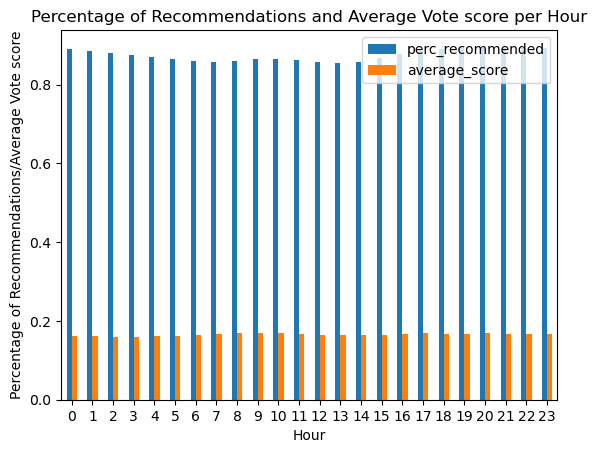

In [62]:
#recommended per hour
df_hour_recommended = df.groupby(['hour','recommended']).size().reset_index(name='count')
df_hour_recommended = df_hour_recommended.pivot(index='hour', columns='recommended', values='count').fillna(0)
df_hour_recommended['perc_recommended'] = df_hour_recommended[True]/(df_hour_recommended[True]+df_hour_recommended[False])
#vote_score per hour
df_hour_score = df.groupby('hour').agg({'weighted_vote_score': 'mean'}).rename(columns={'weighted_vote_score': 'average_score'})
#vote_score and recommended per hour
df_hour_recommended_score=df_hour_recommended.merge(df_hour_score, on='hour').drop(columns=[False,True])

df_hour_recommended_score.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title("Percentage of Recommendations and Average Vote score per Hour")
plt.xlabel("Hour")
plt.ylabel("Percentage of Recommendations/Average Vote score")
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

## 5. Use the function to plot the number of reviews for the following time intervals:
| Initial Time | Final Time |
|--------------|------------|
| 00:00:00     | 02:59:59   |
| 03:00:00     | 05:59:59   |
| 06:00:00     | 10:59:59   |
| 11:00:00     | 13:59:59   |
| 14:00:00     | 16:59:59   |
| 17:00:00     | 19:59:59   |
| 20:00:00     | 23:59:59   |

In [63]:
def plot_reviews_per_time_interval(df, intervals):

    df['time'] = df['timestamp_created'].dt.time
    df['time_interval'] = None

    for initial_time, final_time in intervals:
        mask = (df['time'] >= initial_time) & (df['time'] <= final_time)
        df.loc[mask, 'time_interval'] = f"{initial_time} - {final_time}"
        
    df_timed = df['time_interval'].value_counts().fillna(0)
    
    df_timed.plot(kind='bar', color='#000080')
    plt.title("Reviews per Time Interval")
    plt.xlabel("Time Interval")
    plt.ylabel("Review Count")
    plt.xticks(rotation=45, ha='right')
    plt.ticklabel_format(axis='y', style='plain')
    plt.show()

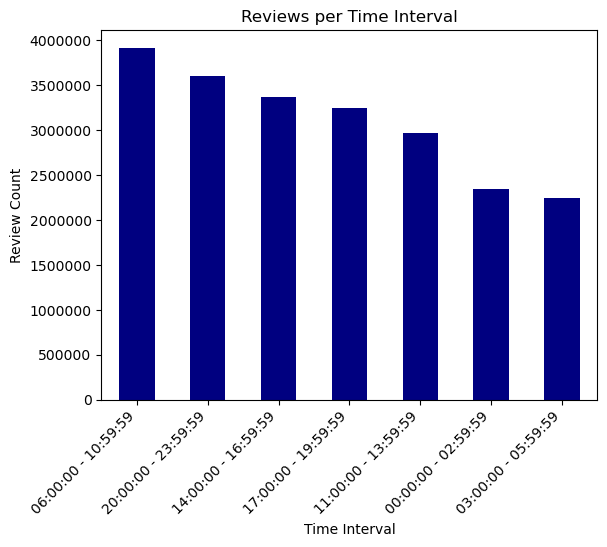

In [64]:
time_intervals = [
    (time(0, 0, 0), time(2, 59, 59)),
    (time(3, 0, 0), time(5, 59, 59)),
    (time(6, 0, 0), time(10, 59, 59)),
    (time(11, 0, 0), time(13, 59, 59)),
    (time(14, 0, 0), time(16, 59, 59)),
    (time(17, 0, 0), time(19, 59, 59)),
    (time(20, 0, 0), time(23, 59, 59))
]
plot_reviews_per_time_interval(df, time_intervals)

We observe that users post the highest number of reviews between 6 a.m. - 11 a.m. and 8 p.m. - 12 p.m., while the lowest number of reviews is posted between 12 p.m. and 6 a.m.

# [RQ4] Investigating whether users who spend more time using an application give higher or lower ratings.

## 1. Analyze the relationship between the amount of time a user has spent on an application and their review score.

Positive Reviews - Average Playtime: 15573.154296875, Median Playtime: 4278.0
Negative Reviews - Average Playtime: 19858.40234375, Median Playtime: 4733.0


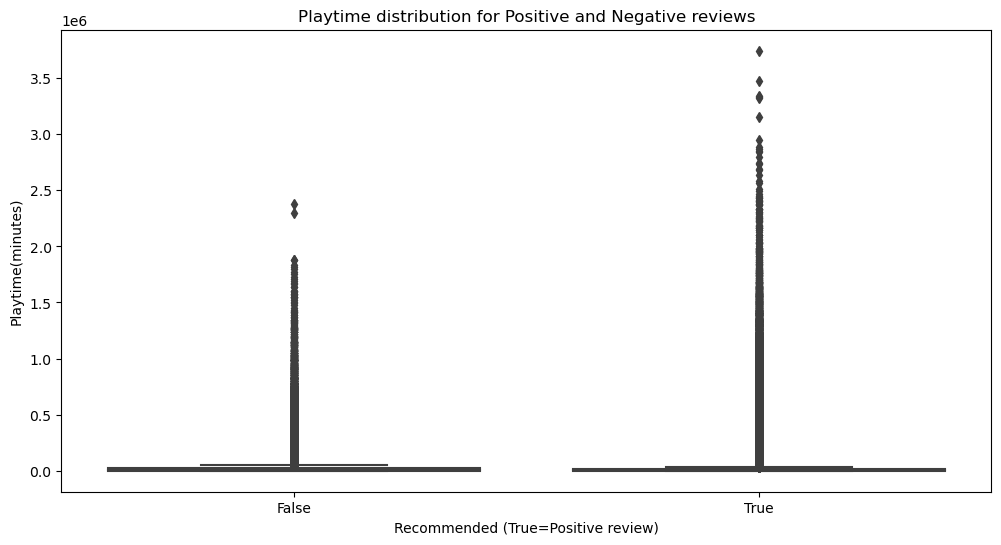

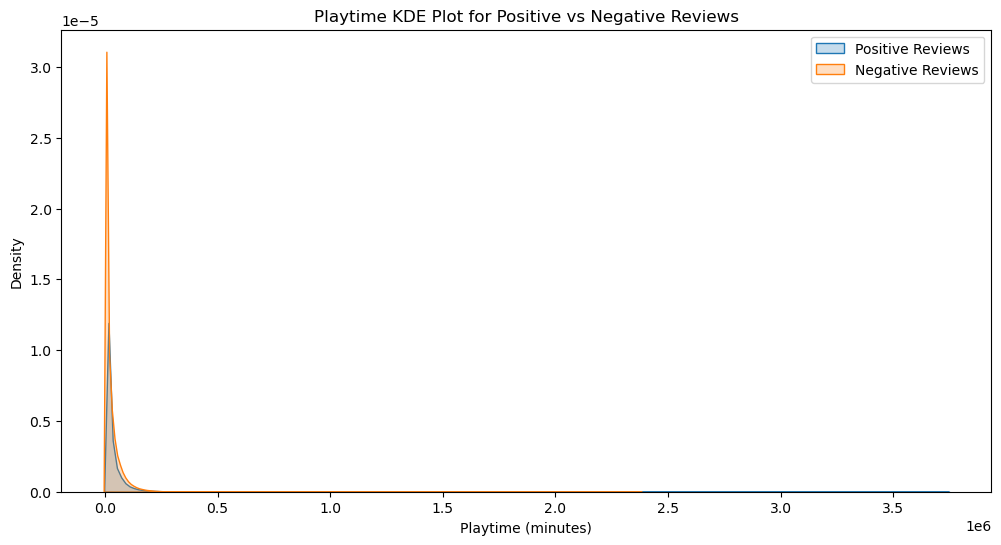

In [65]:
# Filter positive and negative reviews
positive_reviews = df[df["recommended"]==True]
negative_reviews = df[df["recommended"]==False]

# Calculate mean and median for positive values and print them
avg_playtime_positive = positive_reviews["author.playtime_forever"].mean()
med_playtime_positive = positive_reviews["author.playtime_forever"].median()
print(f"Positive Reviews - Average Playtime: {avg_playtime_positive}, Median Playtime: {med_playtime_positive}")

# Calculate mean and median for negative values and print them
avg_playtime_negative = negative_reviews["author.playtime_forever"].mean()
med_playtime_negative = negative_reviews["author.playtime_forever"].median()
print(f"Negative Reviews - Average Playtime: {avg_playtime_negative}, Median Playtime: {med_playtime_negative}")


# Visualize playtime distributions for recommendations using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x = "recommended", y = "author.playtime_forever")
plt.title("Playtime distribution for Positive and Negative reviews")
plt.xlabel("Recommended (True=Positive review)")
plt.ylabel("Playtime(minutes)")
plt.show()


# Visualize playtime density for positive vs. negative reviews using KDE plots
plt.figure(figsize=(12, 6))
sns.kdeplot(positive_reviews['author.playtime_forever'], label='Positive Reviews', fill=True)
sns.kdeplot(negative_reviews['author.playtime_forever'], label='Negative Reviews', fill=True)
plt.title('Playtime KDE Plot for Positive vs Negative Reviews')
plt.xlabel('Playtime (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Observation: Users with more playtime may tend to leave positive reviews.

The visualization suggests that users with higher playtime tend to be more likely to leave positive reviews.


Now, I categorize users, based on ***author.playtime_forever***, into distinct groups according to their playtime:

***New:*** 0–500 minutes

***Intermediate:*** 500–2000 minutes

***Experienced:*** 2000+ minutes

## 2. Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.

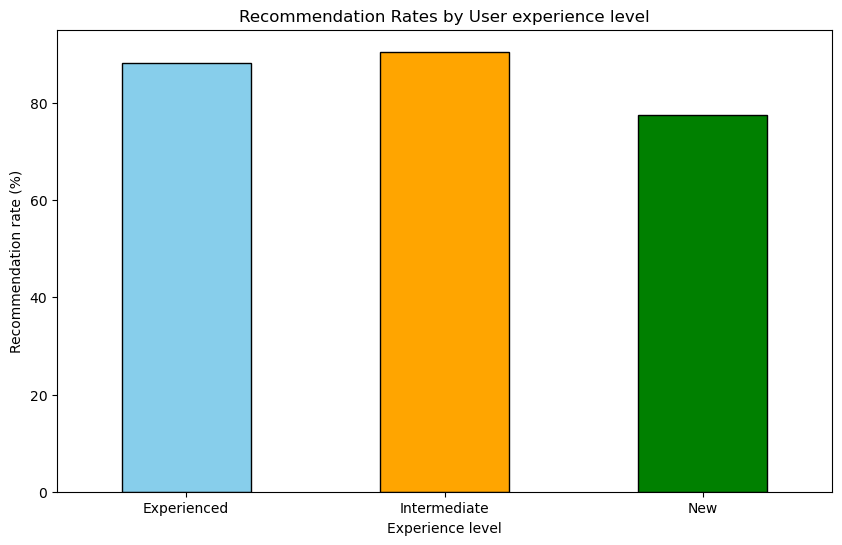

Recommendation Rates by Experience Level:
experience_level
Experienced     88.166943
Intermediate    90.522943
New             77.541460
Name: recommended, dtype: float64


In [66]:
# Categorize users based on playtime: New, Intermediate, Experienced
def categorize_experience(playtime):
    if playtime <= 500:
        return "New"
    elif 500 < playtime <= 2000:
        return "Intermediate"
    else:
        return "Experienced"

# Apply the classification function to the playtime data
df["experience_level"] = df["author.playtime_forever"].apply(categorize_experience)

# Calculate and display recommendation rates for each experience level
recommendation_rates_by_experience = df.groupby("experience_level")["recommended"].mean() * 100

# Plot the recommendation rates by experience level
plt.figure(figsize=(10, 6))
recommendation_rates_by_experience.plot(kind="bar", color=["skyblue", "orange", "green"],edgecolor="black")
plt.title("Recommendation Rates by User experience level")
plt.xlabel("Experience level")
plt.ylabel("Recommendation rate (%)")
plt.xticks(rotation=0)
plt.show()

print("Recommendation Rates by Experience Level:")
print(recommendation_rates_by_experience)

# Observation: Experienced users have a higher recommendation rate, suggesting they are more likely to leave positive reviews.

This suggests that users who spend more time on the application (higher experience level) are more likely to leave positive reviews. So it can be found a correlation between familiarity with the game and a positive sentiment toward it.
It can be said that experienced users, who spent considerable time playing with the game, seem to be more satisfied.

Overall, this suggests a positive correlation between playtime and recommendation rates, with more experienced users generally showing higher satisfaction with the application.

## 3. Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.

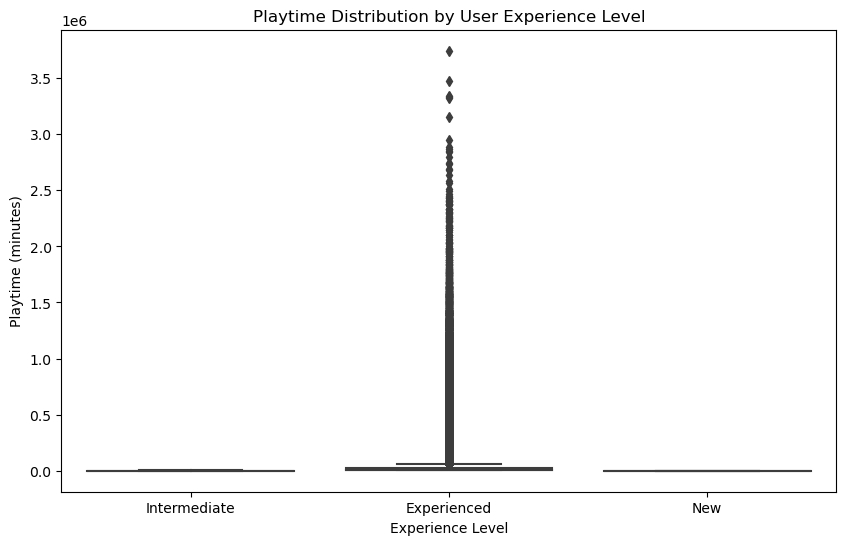


Chi-Square Test Results
Chi-Square Statistic: 272765.88186568127
p-value: 0.0
Degrees of Freedom: 2


In [67]:
# Box plot for playtime distribution across experience levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='author.playtime_forever')
plt.title('Playtime Distribution by User Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Playtime (minutes)')
plt.show()

# Chi-Square Test to check association between experience level and recommendation
experience_recommendation_table = pd.crosstab(df['experience_level'], df['recommended'])
chi2, p, dof, expected = chi2_contingency(experience_recommendation_table)

print("\nChi-Square Test Results")
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")

# The very low p-value from the Chi-Square test suggests a significant association between experience level and recommendation rate.

The ***chi-square statistic*** value measures how much the observed counts for each category (*experience levels* and *recommendation outcomes*) differ from what would be expected if there were no association between experience level and recommendation rate.

A higher chi-square statistic indicates a greater difference from the expected counts, suggesting a stronger association between the two variables.

The ***p-value***, which in our case is extremely small (close to zero), indicates that the probability of observing such a strong association by chance is nearly zero. This indicates an association between experience level and recommendation rate.

## 4. Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?

I asked an LLM tool (ChatGPT) and this is what it said:

**Significant Association**

The Chi-Square test’s very low p-value confirms a strong link between experience level (time spent on the app) and recommendation rate, suggesting that users with different experience levels vary significantly in their likelihood to recommend the app.

**Possible Reasons for the Trend**

***1) Attachment:***

Experienced users may grow attached to the app, increasing their likelihood of recommending it.


***2) Mastery Over Challenges:***

Experienced users may find more satisfaction as they overcome initial difficulties.


***3) Selection Bias:***

Users who dislike the app often stop using it early, leaving more positive, experienced users to continue.


***4) Enhanced Features:***

Some apps unlock new features with more playtime, giving experienced users a richer experience.



***Further Factors to Explore***

***1) Content Unlocks:*** Special features or levels unlocked over time could influence satisfaction.


***2) Community Engagement:*** Social or multiplayer elements may increase positive reviews, especially for experienced users.


***3) Updates:*** Game updates may improve satisfaction, especially for long-term users.

***4) Demographics:*** Certain demographics may be more likely to invest time and leave positive reviews.

***Validation Methods***

***1) Review Content Analysis:***
 Use sentiment analysis to identify themes in reviews.

***2) Feature Engagement Tracking:***
Compare recommendation rates with specific feature usage.

***3) Demographic Analysis:*** Study recommendation trends across different demographics.

***4) Timing of Reviews:*** Look at review timing in relation to major updates.

## Final thoughts

So, in order to validate the interpretations provided by the LLM, there are some things that we can do:

We can conduct statistical tests to examine each suggested reason (attachment, selection bias, ecc.). Doing this will help us to determine if there are significant differences in the data that align with each hypothesis.

Another thing that we can do is use various analytical methods (sentiment analysis, that provide insights into user emotions, demographic analysis, that identify patterns across different user groups, ecc.) in order to explore each hypothesis further.

After completing the analyses, we can compare the findings to the LLM's interpretations. Document which factors are supported by the data, highlighting areas where the LLM's suggestions were validated or where the data provided different insights.

In the end, we can say that the LLM suggest some factors that could explain why users who spend more time on the app give higher or lower ratings.

# [RQ5] It is interesting to explore the top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently.

## 1. Determine the ten reviewers with the highest number of reviews in the dataset.

In [113]:
# Count occurrences of each author.steamid
review_counts = df['author.steamid'].value_counts()

# Get the top 10 reviewers by review count
top_10_reviewers = review_counts.nlargest(10)

top_10_reviewers_df = top_10_reviewers.reset_index()


# Rename columns
top_10_reviewers_df.columns = ['Author SteamId', 'Review Number']

# Print the DataFrame
print("Top 10 reviewers by number of reviews:")
print(top_10_reviewers_df)

Top 10 reviewers by number of reviews:
      Author SteamId  Review Number
0  76561198062813911            149
1  76561198315585536            132
2  76561198192166873            107
3  76561198239163744            106
4  76561198045381877            103
5  76561198064946151            100
6  76561198013146396             99
7  76561198027973295             96
8  76561197969749884             88
9  76561197989746995             86


## 2. What is the percentage of each language used by these top 10 reviewers when submitting a review?

In [114]:
top_10_reviewers = review_counts.nlargest(10).index
top_10_reviews = df[df['author.steamid'].isin(top_10_reviewers)]
# Calculate language distribution for the top 10 reviewers
language_distribution = top_10_reviews['language'].value_counts(normalize=True) * 100

# Reset index to make 'language' a regular column
language_distribution_df = language_distribution.reset_index()

# Rename columns
language_distribution_df.columns = ['Language', 'Percentage']

# Print the DataFrame
print("Percentage of each language used by the top 10 reviewers:")
print(language_distribution_df)

Percentage of each language used by the top 10 reviewers:
   Language  Percentage
0   english   53.939962
1   russian   28.142589
2  schinese   17.917448


#### The languages used by top 10 reviewrs line up as English, Russian and schinese as 53.93%, 28.1% and 17.9% recpectively.

## 3. Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.

In [115]:
# Calculate total helpful votes and total review count for top 10 reviewers
total_helpful_votes = top_10_reviews['votes_helpful'].sum()
total_review_count = top_10_reviews.shape[0]  # Total reviews from top 10 reviewers

# Calculate the average number of helpful votes per review for each top reviewer
helpful_votes_avg = top_10_reviews.groupby('author.steamid')['votes_helpful'].mean()
# Sort by average helpful votes for better insight
helpful_votes_avg = helpful_votes_avg.sort_values(ascending=False)

# Calculate the total helpful votes per reviewer
helpful_votes_sum = top_10_reviews.groupby('author.steamid')['votes_helpful'].sum()

# Calculate the total reviews per reviewer
review_count_per_reviewer = top_10_reviews.groupby('author.steamid').size()

# Combine into a DataFrame
helpful_votes_df = pd.DataFrame({
    'Author SteamId': helpful_votes_avg.index,
    'Avg Helpful Votes': helpful_votes_avg.values,
    'Total Helpful Votes': helpful_votes_sum.values,
    'Total Reviews': review_count_per_reviewer.values
})
# Print the DataFrame to verify
print("Top 10 Reviewers' Average Helpful Votes, Total Helpful Votes and Total Reviews:")
print(helpful_votes_df.to_string())

Top 10 Reviewers' Average Helpful Votes, Total Helpful Votes and Total Reviews:
      Author SteamId  Avg Helpful Votes  Total Helpful Votes  Total Reviews
0  76561198315585536          49.712121                 2309             88
1  76561198192166873          38.897196                 1811             86
2  76561197969749884          26.238636                   96             99
3  76561197989746995          21.058140                 1133             96
4  76561198027973295          11.802083                  232            103
5  76561198239163744           7.641509                  132            149
6  76561198064946151           3.990000                  399            100
7  76561198045381877           2.252427                 4162            107
8  76561198013146396           0.969697                  810            106
9  76561198062813911           0.885906                 6562            132


In addition to my table, I added columns for total helpful votes and total reviews, where I wanted to see the correlation between increasing the number of comments and receiving helpful votes. Among the top 10 commenters, there is a positive increasing correlation between increasing the number of comments and receiving helpful votes. Therefore, if we consider that users who comment a lot have a high level of experience, I can say that this contributes to getting helpful votes. They may also be correcting the feedback they receive in each comment as the number of comments increases.

If there was also information on the length of comments, we could also show whether there is a relationship between comment length and helpful votes.

## 4. Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

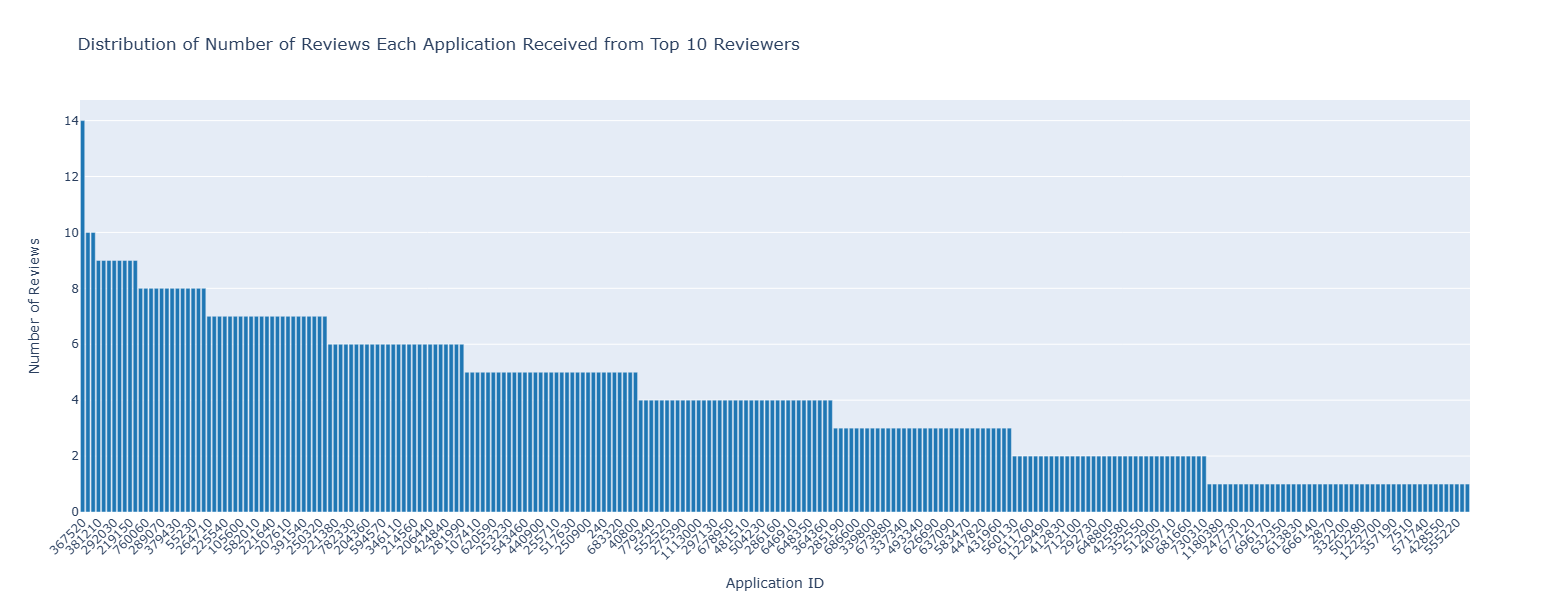

In [116]:
# Use top_10_reviewers directly as it already contains the reviewer IDs
top_10_reviews = df[df['author.steamid'].isin(top_10_reviewers)]

# Count the number of reviews each application received from these reviewers
app_review_counts = top_10_reviews['app_id'].value_counts().reset_index()
app_review_counts.columns = ['Application ID', 'Review Count']


# Ensure Application IDs are treated as strings
app_review_counts['Application ID'] = app_review_counts['Application ID'].astype(str)

# Create the interactive bar plot with Plotly and adjust color for visibility
fig = px.bar(
    app_review_counts,
    x='Application ID',
    y='Review Count',
    title="Distribution of Number of Reviews Each Application Received from Top 10 Reviewers",
    labels={'Review Count': 'Number of Reviews', 'Application ID': 'Application ID'},
    color_discrete_sequence=["#1f77b4"]  # Use a distinct blue for better visibility
)

# Customize layout for readability
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},  # Ensure X-axis is ordered by review count
    xaxis_tickangle=-45,  # Tilt x-axis labels for readability
    height=600  # Set a suitable height for the plot
)

# Display the interactive plot
fig.show()

#### I used the `plotly.express` module for this need, because I had more than 250 applications to show the graph on the x or y axis. This made it difficult for users to read. After searching the web, I found plotly.express. This module allows to create an interactive bar chart or heatmap that viewers can zoom in and hover over to see details for specific apps and reviewers. So you can view the number of reviews each app has received from the top 10 reviewers

# [RQ6] Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers

## 1. Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?

In [117]:
# Count occurrences of each review_id
review_counts = df['review_id'].value_counts()

# Filter for edited reviews (review_id with more than one occurrence)
edited_reviews = review_counts[review_counts > 1].index
edited_df = df[df['review_id'].isin(edited_reviews)]

# Filter by language for edited reviews
english_edits = edited_df[edited_df['language'] == 'english']
spanish_edits = edited_df[edited_df['language'] == 'spanish']

# Calculate percentage of edited reviews in each language
total_english_reviews = len(df[df['language'] == 'english'])
total_spanish_reviews = len(df[df['language'] == 'spanish'])
english_edit_percentage = (len(english_edits) / total_english_reviews) * 100
spanish_edit_percentage = (len(spanish_edits) / total_spanish_reviews) * 100

# Print results
print(f"Percentage of English reviews edited: {english_edit_percentage:.2f}%")
print(f"Percentage of Spanish reviews edited: {spanish_edit_percentage:.2f}%")

Percentage of English reviews edited: 1.14%
Percentage of Spanish reviews edited: 2.20%


#### Spanish reviews are slightly more edited than English reviews. About 2.2 out of every 100 Spanish reviews are edited by reviewers. At the same time, this rate is 1.14% for English reviewers.

## 2. Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated?

In [118]:
df = df.dropna(subset=['author.num_games_owned', 'language', 'app_id'])

# Group data by language
english_df = df[df['language'] == 'english']
spanish_df = df[df['language'] == 'spanish']

# Calculate average number of games owned for each language group
average_games_owned_english = english_df['author.num_games_owned'].mean()
average_games_owned_spanish = spanish_df['author.num_games_owned'].mean()

# Calculate average number of unique games reviewed for each language group
average_games_reviewed_english = english_df.groupby('author.steamid')['app_id'].nunique().mean()
average_games_reviewed_spanish = spanish_df.groupby('author.steamid')['app_id'].nunique().mean()

# Print results
print(f"Average number of games owned by English reviewers: {average_games_owned_english:.2f}")
print(f"Average number of games owned by Spanish reviewers: {average_games_owned_spanish:.2f}")
print(f"Average number of unique games reviewed by English reviewers: {average_games_reviewed_english:.2f}")
print(f"Average number of unique games reviewed by Spanish reviewers: {average_games_reviewed_spanish:.2f}")

Average number of games owned by English reviewers: 166.83
Average number of games owned by Spanish reviewers: 121.92
Average number of unique games reviewed by English reviewers: 1.81
Average number of unique games reviewed by Spanish reviewers: 1.63


## Considerations:

- The English reviewers have an unusually high average number of games owned as 166.89. This large number suggests that there might be outliers or data points with extremely high values in this group, which significantly increase the average. This could be due to a few English reviewers with exceptionally large game libraries.

- At the same time, both groups review a relatively small number of unique games on average. Average number of unique games reviewed by English reviewers is slightly higher than Spanish,1.81 and 1.63 respectively.  This implies that, despite having access to a large library of games (especially in the case of English reviewers), they tend to review only a few games. This is a typical behavior for some users, who may purchase or collect games but only actively engage with a few of them.

# [RQ7] Certainly, calculating probabilities and conducting statistical tests are essential skills for any data scientist. Let's calculate some intriguing figures.

## 1. What is the probability of submitting a review and receiving at least one helpful vote from other users?

In [120]:
helpful_reviews_count = (df["votes_helpful"] >= 1).sum()
total_reviews_count = len(df["votes_helpful"])

probability_helpful = helpful_reviews_count / total_reviews_count

print(f"{probability_helpful * 100:.2f}%")

28.07%


## 2. What is the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app?

In [121]:
# Remind : negative_reviews : negative_reviews = df[df["recommended"]==False]

helpful_not_recommended_count = (negative_reviews["votes_helpful"] >= 1).sum()
total_not_recommended_count = len(negative_reviews)

probability_helpful_given_not_recommended = helpful_not_recommended_count / total_not_recommended_count

print(f"{probability_helpful_given_not_recommended * 100:.2f}%")

48.45%


## 3. Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? Elaborate on it.

To determine whether the probability of "a review receiving at least one helpful vote" is independent of the probability that "the reviewer has submitted at least five reviews before the current review", are needed:

- #### 𝑃(𝐴): Probability that a review has received at least one helpful vote.

- #### 𝑃(𝐵): Probability that a reviewer has submitted at least five reviews.

- #### 𝑃(𝐴∩𝐵): Probability that both conditions are met (a review has received at least one helpful vote, and the reviewer has submitted at least five reviews).

Two events are independent if the probability of both events happening together, 𝑃(𝐴∩𝐵) is equal to the product of the individual probabilities 𝑃(𝐴) and 𝑃(𝐵).

#### So, if the equality 𝑃(𝐴∩𝐵) = 𝑃(𝐴)×𝑃(𝐵) holds, the events are independent.

#### Equivalently, we can also say that: P(A∣B)=P(A)

In [119]:
# Ensure relevant columns and data preparation
data = df[["author.steamid", "timestamp_created","votes_helpful"]].copy()
data = data.sort_values(by=["author.steamid", "timestamp_created"])
data["cumulative_reviews"] = data.groupby("author.steamid").cumcount()

# Define Events A and B
five_prior_reviews = data["cumulative_reviews"] >= 4
helpful_vote = data["votes_helpful"] > 0

# Calculate probabilities
probability_helpful = helpful_vote.mean()
probability_five_prior_reviews = five_prior_reviews.mean()
probability_helpful_given_five_prior = data[helpful_vote & five_prior_reviews].shape[0] / five_prior_reviews.sum()

# Print results with percentage formatting
print(f"P(A): {probability_helpful:.2%}")
print(f"P(B): {probability_five_prior_reviews:.2%}")
print(f"P(A|B): {probability_helpful_given_five_prior:.2%}")

# Check for independence
independent = abs(probability_helpful_given_five_prior - probability_helpful) < 0.01
print("The events A and B are independent." if independent else "The events A and B are dependent.")

P(A): 28.07%
P(B): 10.90%
P(A|B): 36.51%
The events A and B are dependent.


## 4. We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.

In [77]:
df[["author.num_games_owned","author.num_reviews"]].corr()

,author.num_games_owned,author.num_reviews
author.num_games_owned,1.000000,0.331329
author.num_reviews,0.331329,1.000000


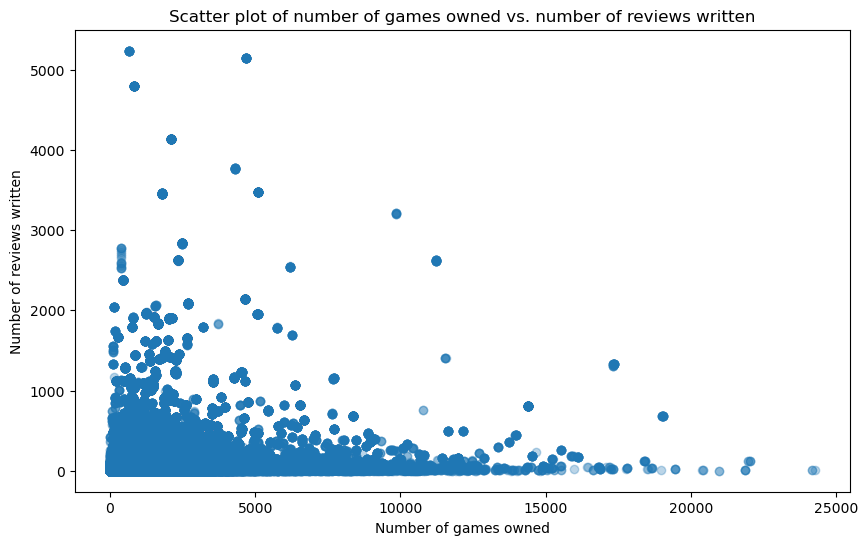

In [78]:
# Scatter plot of games owned vs reviews written
plt.figure(figsize=(10, 6))
plt.scatter(df["author.num_games_owned"], df["author.num_reviews"], alpha=0.3)
plt.title("Scatter plot of number of games owned vs. number of reviews written")
plt.xlabel("Number of games owned")
plt.ylabel("Number of reviews written")
plt.show()

#### The graph shows that most users own a few games and write a few reviews (concentrated in the lower left). As the number of games they own increases, the amount of reviews tends to decrease: 
- Overall, we can see that users with fewer games seem to be more active in leaving reviews, showing a higher level of engagement with each title. In contrast, users with very large game libraries seem less inclined to review frequently. This may indicate a different way of enjoying games: those with many games may explore new titles without stopping to review them, while those with fewer games may invest more time in each title, even going so far as to write a review.


## 5.Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis. Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM?


I asked an LLM tool (ChatGPT) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis, this is what it said:

- Each plot type—histogram, bar plot, scatter plot, and pie chart—serves a unique purpose in exploring data and uncovering specific insights. However, relying solely on visual cues can sometimes lead to misinterpretations or oversights, particularly when sample sizes are uneven, there are outliers, or complex relationships are oversimplified by the chosen visualization.

- To strengthen the reliability of insights from these plots, it's essential to complement them with statistical tests.

- For example, if a histogram suggests skewness, a normality test can confirm whether this pattern is statistically significant. Similarly, if a bar plot indicates differences between groups, performing a Chi-Square test or t-test can verify if these differences are meaningful rather than due to chance.

- Adjusting for sample size is also crucial. Larger datasets can amplify small differences, making them appear more significant than they are, while small datasets may not reveal genuine patterns. Displaying confidence intervals or error bars on plots helps provide context for interpreting differences accurately.

- Exploring alternative visualizations can also provide more nuanced insights. For instance, if there’s a lot of overlap in a scatter plot, using a density plot or adding trend lines can help reveal underlying relationships more clearly. Additionally, accounting for outliers is can be valuable, as these data points can skew the overall interpretation of a dataset. Identifying and analyzing outliers separately can clarify whether they represent true deviations or data anomalies.

- By combining statistical validation, careful handling of sample sizes, exploring alternative visual options, and addressing outliers, you can greatly enhance the accuracy and trustworthiness of insights drawn from these visualizations. These practices strengthen the analysis, ensuring that conclusions are data-driven and reliable.

## Considerations:

So, in the end what we can say is that while histograms, bar plots ecc. provide valuable perspectives on data, if we rely only on their visual interpretation, we can be lead to potential misinterpretations.
To be sure about accuracy and reliability in data analysis, one thing that we can do is to complement these visualizations with statistical validation (for example the Chi-Square tests), in order to confirm observed patterns and differences.
Using these practices, we can make interpretations statistically valid.

# BONUS. Sentiment analysis of english reviews by users in Steam platform

## Why only english reviews were considered ?

The decision to focus exclusively on english reviews was made for both convenience and accuracy. Translating millions of reviews written in a multitude of languages into english presents significant challenges that would impact the quality and consistency of the analysis. Here is a breakdown of the main issues involved:

1. Machine translation tools, while powerful, often struggle with nuances, colloquialisms, and slang unique to each language. This can lead to mistranslations or loss of context, especially with game-specific terminology or culturally specific references;

2. Processing and translating millions of reviews from multiple languages is a resource-intensive task. It would not only require significant computational power, but also additional layers of advanced error checking to ensure accuracy;

3. Sentiment analysis algorithms often perform best when trained in a specific language due to linguistic and cultural nuances. By focusing only on English reviews, the analysis will be more reliable and accurate, as it avoids the complexities and potential inaccuracies of machine translation;

4. The English review dataset comprises nearly 50% of all entries in the `language` column, providing a substantial and representative sample size. This large portion of data helps ensure that the analysis results offer a reliable reflection of overall user sentiments.

In [79]:
# Only consider specific column for this analysis
english_reviews = df[["review", "recommended", "votes_helpful"]].loc[df["language"] == "english"]
english_reviews

,review,recommended,votes_helpful
3,"One of the best RPG's of all time, worthy of a...",True,0
5,"good story, good graphics. lots to do.",True,0
6,"dis gud,",True,0
18,favorite game of all time cant wait for the Ne...,True,0
20,Why wouldn't you get this,True,0
...,...,...,...
21747369,best game ever\n,True,0
21747371,Holy balls,True,0
21747372,"A tripod thing bears down on you, it looks imm...",True,0
21747373,Honestly this is the best vr game ever,True,0


## VADER Lexicon for Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment analysis tool designed for analyzing social media text and short user-generated content. By downloading the VADER lexicon using `nltk.download('vader_lexicon')`, users can access a pre-built dictionary that provides sentiment scores for words, allowing for efficient sentiment analysis of text data through the Natural Language Toolkit (NLTK) library.

In [80]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\flavi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## 1. Perform sentiment analysis on the review texts in the top 3 languages and classify them as positive, negative, or neutral.

In [81]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
text_analyzer = SentimentIntensityAnalyzer()

# Define a function to analyze the sentiment of a given text
def get_sentiment(text):
    # Use the analyzer to get the polarity scores of the input text
    # The 'compound' score represents the overall sentiment, ranging from -1 (negative) to 1 (positive)
    score = text_analyzer.polarity_scores(text)['compound']
    
    # Return the compound sentiment score
    return score

## Swifter library overview

The **Swifter** library in Python is used to optimize to makes data processing in pandas DataFrames faster and more efficient, especially for functions that require complex processing on large datasets.

### Main function:

- **Parallelization:** The library allows you to apply the get_sentiment function to each element of the review column in parallel, using multiple CPU cores. This results in a significant reduction in execution time compared to using the pandas apply() function alone.



In [82]:
english_reviews['sentiment'] = english_reviews['review'].swifter.apply(get_sentiment)
english_reviews['sentiment'].head()

Pandas Apply:   0%|          | 0/9606838 [00:00<?, ?it/s]

3     0.7964
5     0.7003
6     0.0000
18    0.4588
20    0.0000
Name: sentiment, dtype: float64

In [83]:
english_reviews['sentiment'].describe()

count    9.606838e+06
mean     3.850793e-01
std      5.012389e-01
min     -1.000000e+00
25%      0.000000e+00
50%      5.095000e-01
75%      8.020000e-01
max      1.000000e+00
Name: sentiment, dtype: float64

## Classify the scores as positive, negative or neutral

In [84]:
english_reviews['sentiment_names'] = np.where(english_reviews['sentiment'] < 0, 'negative', np.where(english_reviews['sentiment'] == 0, 'neutral', 'positive'))

# count the values for eache sentiment group
english_reviews['sentiment_names'].value_counts()

sentiment_names
positive    6700339
neutral     1478270
negative    1428229
Name: count, dtype: int64

### Example of reviews with `positive` sentiment

In [85]:
for i, review in enumerate(english_reviews["review"][english_reviews['sentiment_names'] == "positive"][:5], start=1):
    print(f"{i}. Review: {review}")

1. Review: One of the best RPG's of all time, worthy of any collection
2. Review: good story, good graphics. lots to do.
3. Review: favorite game of all time cant wait for the NexGen Versiion
4. Review: it is ok

5. Review: worth



### Example of reviews with `neutral` sentiment

In [86]:
for i, review in enumerate(english_reviews["review"][english_reviews['sentiment_names'] == "neutral"][:5], start=1):
    print(f"{i}. Review: {review}")

1. Review: dis gud,
2. Review: Why wouldn't you get this
3. Review: Isn't Geralt hot enough to get both Yennefer and Triss ? I guess I watched too much harem anime...
4. Review: The only thing bigger than the world map is ur mom
5. Review: .


### Example of reviews with `negative` sentiment

In [87]:
for i, review in enumerate(english_reviews["review"][english_reviews['sentiment_names'] == "negative"][:5], start=1):
    print(f"{i}. Review: {review}")

1. Review: The game is enjoyable enough but...
-Combat has plenty of options but the game will play for you at times, takes away from player achievements.
-The Story is good so far but so much of it, listening to every nagging thought is getting old fast.
-The swords and armor having a level is retarded, how is it that this legendary warrior cannot use the same sword of the 8 guys he just killed. This feature is killing the game for me.
-The repairs and crafting I hate, its not my thing. never is.
2. Review: They certainly dumbed down the series since the last release. Sure it raked in a larger audience but it sacrificed what is was previously in the process, which was once well written and unique instead became copy-paste and bland. The game completely omits that Triss did nothing but screw Geralt over with everything she's done involving for the Sorceresses Lodge, most likely just to have her as a romance option. This isn't the only thing it omits either.

Nothing says player hand ho

In [88]:
sentiment_counts=english_reviews['sentiment_names'].value_counts()
sentiment_counts

sentiment_names
positive    6700339
neutral     1478270
negative    1428229
Name: count, dtype: int64

In [89]:
total= sum(sentiment_counts)
total

9606838

In [90]:
# Calculate the percentage of each group
Positive_percent=sentiment_counts[0]/total * 100
Neutral_percent= sentiment_counts[1]/total * 100
Negative_percent= sentiment_counts[2]/total * 100

print(f"The Positive percent is {str(round(Positive_percent,2))}% "
     f"Neutral percent is {str(round(Neutral_percent,2))}% "
     f"Negative percent is {str(round(Negative_percent,2))}%")

The Positive percent is 69.75% Neutral percent is 15.39% Negative percent is 14.87%


## 2. What is the distribution of sentiment across all reviews?

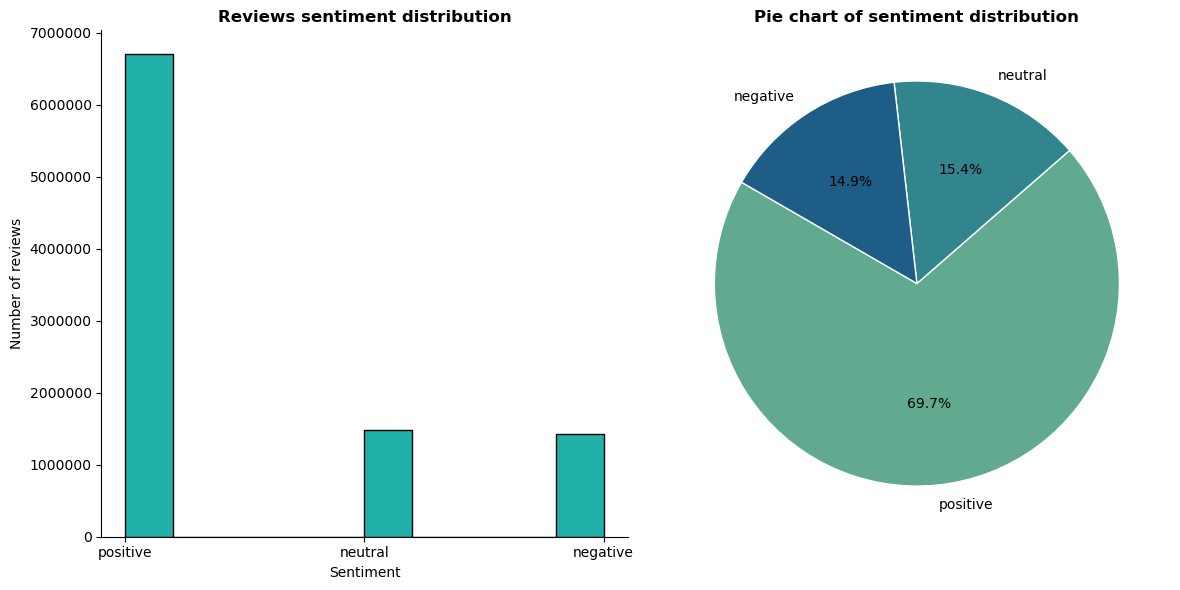

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(english_reviews['sentiment_names'],color="lightseagreen", edgecolor='black')
axs[0].set_title('Reviews sentiment distribution',fontsize=12,weight="bold")
axs[0].set_ylabel('Number of reviews')
axs[0].ticklabel_format(axis="y", style="plain")
axs[0].set_xlabel('Sentiment')
sns.despine()

axs[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=150, 
           colors=sns.color_palette("crest", 3), wedgeprops={'edgecolor': 'white', 'linewidth': 1})
axs[1].set_title('Pie chart of sentiment distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Steam game reviews sentiment Analysis

The following analysis explores the sentiment distribution of Steam game reviews in **English**, which range from -1.0 (negative) to 1.0 (positive).

### Dataset size information and implications

- For this analysis we considered almost 10 milion text ☠

### Comments of the results

- Steam community shows a **strong tendency** toward positive feedback
- Only about 14.87% of reviews are negative
- The number of neutral reviews is similar to the number of negative reviews

### Considerations

- Steam users generally provide **positive feedback**, indicating satisfaction with the games reviewed.
- Extremely negative reviews are **uncommon**, suggesting that users are either content with their experiences or selective in their critiques.
- **Moderate positivity** seems to be the norm rather than extreme opinions, reflecting a balanced perspective among reviewers.
- The review system illustrates a **healthy and engaged community**, contributing to the overall success of games on the platform.

## 3. Does the sentiment analysis align with whether the application is recommended or not ?

In [92]:
# Group by 'sentiment' and count occurrences of 'recommended' values
groupby_sentiment = english_reviews.groupby('sentiment_names')['recommended']
groupby_sentiment.value_counts()

sentiment_names  recommended
negative         True            896358
                 False           531871
neutral          True           1340362
                 False           137908
positive         True           6321899
                 False           378440
Name: count, dtype: int64

In [93]:
# Calculate the percentages
groupby_sentiment_percent=groupby_sentiment.value_counts(normalize=True).unstack() * 100
# Rename columns for clarity
groupby_sentiment_percent.columns = ['Not Recommended (%)', 'Recommended (%)']
groupby_sentiment_percent = groupby_sentiment_percent.round(1)

groupby_sentiment_percent

,Not Recommended (%),Recommended (%)
sentiment_names,,
negative,37.2,62.8
neutral,9.3,90.7
positive,5.6,94.4


In [94]:
groupby_sentiment = groupby_sentiment.value_counts().unstack()
# Rename columns for clarity
groupby_sentiment.columns = ['Not Recommended', 'Recommended']

# Show new table:
groupby_sentiment

,Not Recommended,Recommended
sentiment_names,,
negative,531871,896358
neutral,137908,1340362
positive,378440,6321899


In [95]:
# Melting the groupby_sentiment dataFrame to transform it from wide format to long format.
# This is useful for visualizing data with libraries like Seaborn or Matplotlib.
groupby_sentiment_melted = pd.melt(groupby_sentiment.reset_index(), id_vars='sentiment_names', value_vars=['Not Recommended', 'Recommended'],var_name='Recommendation status',  value_name='Value_counts')
#show the data in long format:
groupby_sentiment_melted

,sentiment_names,Recommendation status,Value_counts
0,negative,Not Recommended,531871
1,neutral,Not Recommended,137908
2,positive,Not Recommended,378440
3,negative,Recommended,896358
4,neutral,Recommended,1340362
5,positive,Recommended,6321899


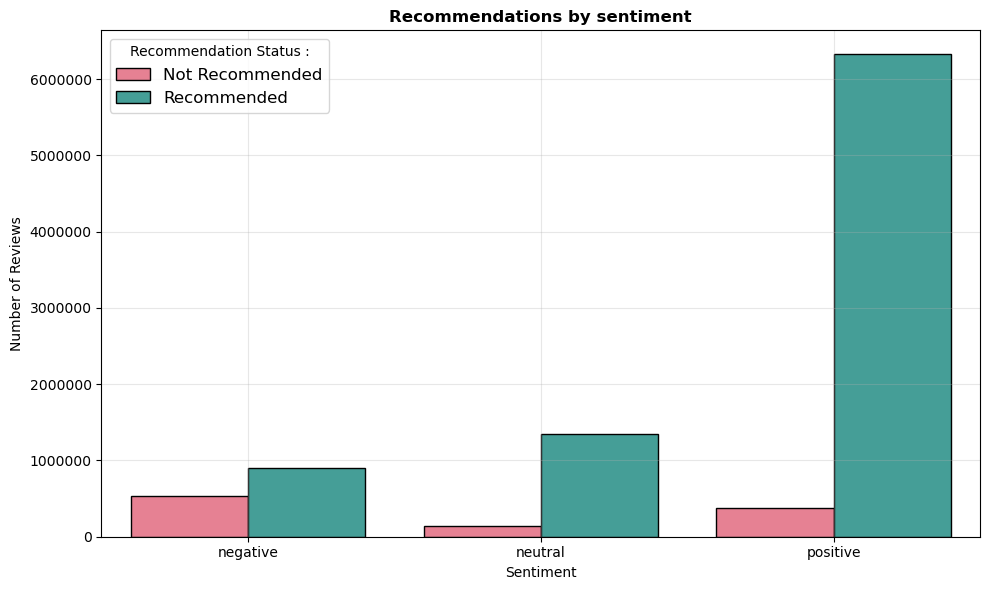

In [96]:
# Plot the graph 
plt.figure(figsize=(10,6))
sns.barplot(data=groupby_sentiment_melted, x='sentiment_names', y='Value_counts', hue='Recommendation status', palette="husl",edgecolor="black")
plt.title('Recommendations by sentiment',fontsize=12,weight="bold")
plt.xlabel('Sentiment',fontsize=10)
plt.ylabel('Number of Reviews',fontsize=10)
plt.ticklabel_format(axis="y", style="plain")
plt.legend(title='Recommendation Status :',fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()  
plt.show()

## Observations from the grouped bar chart

Looking at the clustered bar chart showing "Recommendations by Sentiment", we can make several observations:

### 1. Strong Positive Alignment
- There is a very strong correlation between positive sentiment and recommendations.
- The number of recommended reviews with positive sentiment (teal bar) is significantly higher (~6 million) than non-recommended reviews (pink bar).
- This suggests that users who recommend the app generally express positive sentiment in their reviews.

### 2. Neutral Reviews
- For neutral sentiment, there is still a preference for recommending the app.
- The ratio shows more recommendations than non-recommendations, although the overall numbers are lower than positive reviews.
- This suggests that neutral reviewers also tend to take other factors into account beyond this.

### 3. Negative Reviews
- For negative sentiment, the gap between recommended and non-recommended is smaller. -
- There is still a slight bias towards recommendations even in negative reviews.
- This is interesting because it highlights that some users may criticize aspects of the game but still recommend it. This duality suggests that users are able to distinguish between specific features or experiences that they feel are lacking and the overall value of the game. It implies that despite some criticism, they recognize the game's strengths, such as enjoyable gameplay mechanics, engaging storylines, or other aspects that enhance their experience. This phenomenon indicates a deeper level of engagement, where users are not simply looking for perfection, but are willing to recommend the game based on its overall contribution to their enjoyment or satisfaction.

## Insights

Based on these observations, we can conclude that:

1. There is a clear correlation between positive sentiment and likelihood to recommend.
2. Even neutral and negative reviews tend to lean towards recommendations, suggesting that the app has fundamental value despite criticism.
3. The vast majority of reviews are positive and recommended, which indicates overall user satisfaction.
4. The relatively small number of non-recommended reviews across the board suggests that the app generally meets user expectations.



## 4. Is there a correlation between the sentiment of a review and the number of helpfulness votes it receives? Provide an analysis of the results and discuss potential trends.

In [97]:
vote_sentiment=english_reviews[['sentiment', 'votes_helpful','sentiment_names']]
vote_sentiment

,sentiment,votes_helpful,sentiment_names
3,0.7964,0,positive
5,0.7003,0,positive
6,0.0000,0,neutral
18,0.4588,0,positive
20,0.0000,0,neutral
...,...,...,...
21747369,0.6369,0,positive
21747371,0.0000,0,neutral
21747372,0.8074,0,positive
21747373,0.8020,0,positive


In [98]:
# Count the number of votes based on the sentiment of the review (Positive, Negative,Neutral)

vote_sentiment.groupby('sentiment_names')['votes_helpful'].sum().sort_values(ascending=False)

sentiment_names
positive    11222225
negative     5573497
neutral      1854903
Name: votes_helpful, dtype: int32

In [99]:
# show the correlation between sentiment and votes_helpful column

vote_sentiment[['sentiment', 'votes_helpful']].corr()

,sentiment,votes_helpful
sentiment,1.000000,-0.011093
votes_helpful,-0.011093,1.000000


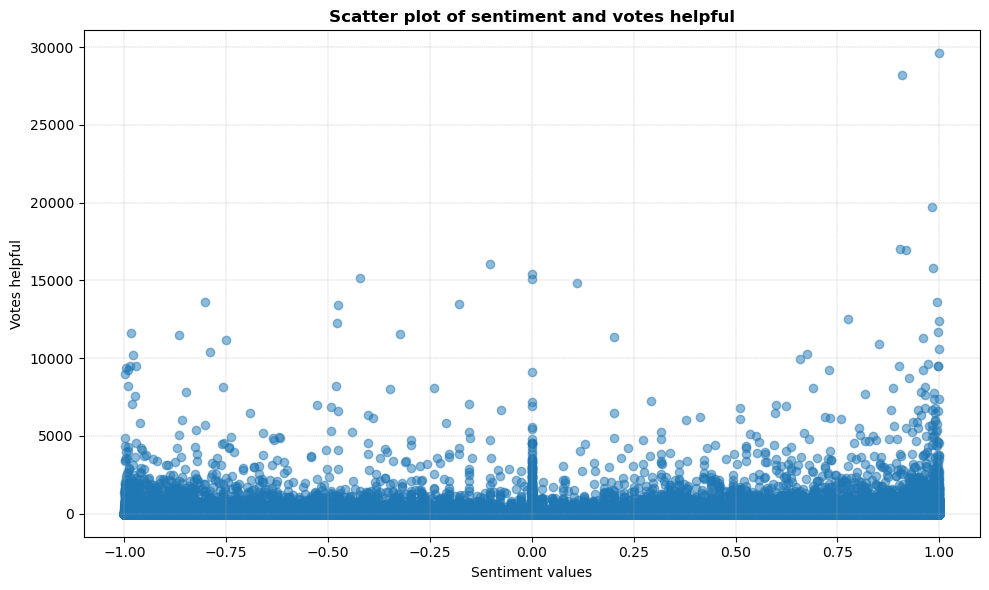

In [100]:
# Show scatter plot to see the correlation
plt.figure(figsize=(10, 6))
plt.scatter(vote_sentiment['sentiment'], vote_sentiment['votes_helpful'], alpha=0.5)  

plt.title('Scatter plot of sentiment and votes helpful',weight="bold")
plt.xlabel('Sentiment values')
plt.ylabel('Votes helpful')
plt.grid(True, which="both", ls="--", linewidth=0.3)

plt.tight_layout()
plt.show()

## Review sentiment and analysis of the results and discuss potential trends

According to the results, there is no significant correlation between the sentiment of a review and the number of helpfulness votes it receives. However, it is noteworthy that reviews with positive sentiment receive significantly more votes overall than negative and neutral reviews. This suggests that:

- Users rate the helpfulness of a review independently of its sentiment.
- Positive reviews receive **11,222,225 votes**, indicating high engagement and support among users for that type of review.
- Negative reviews receive **5,573,497 votes**, while neutral reviews receive **1,854,903 votes**, confirming that neutral reviews are not voted because they fail to provide enough information about the player's gaming experience as negative and positive reviews do.

### Implications
- Although there is a high volume of helpfulness votes for positive reviews, the lack of significant correlation indicates that users may still evaluate reviews based on criteria beyond sentiment, such as:
- Quality of writing ;
- Detail of analysis ;
- Clarity and structure of the review.

Users appear to evaluate the helpfulness of a review more objectively, as the positive or negative tone does not significantly influence its perceived helpfulness beyond the number of votes it receives.




# **Algorithm question**

## Informat about the Algorithm

You are given two positive integers, ( n ) (where 1 ≤ n ≤ 10^9) and  k (where q ≤ k ≤ 100).Your task is to express n as the sum of k positive integers, all having the same parity (i.e., all have the same remainder when divided by 2, meaning they are either all even or all odd). In other words, find a₁, a₂, ..., aₖ , each aᵢ > 0, such that n = a₁ + a₂ + ... + aₖ, and all aᵢ simultaneously are either even or odd. If it's impossible to represent n in this way, report that no such representation exists.

- ## Input
In the first input line, you will receive a number t (where 1 ≤ t ≤ 100), representing the number of test cases. The following t lines will contain two values, n and k, corresponding to each test case.

- ## Output
For each test case, if it is possible to represent n as the sum of k positive integers, all of the same parity (either all even or all odd), print YES and provide the corresponding values of aᵢ in the next line. If there are multiple valid solutions, you can print any of them. If such a representation is not possible for a given test case, print NO.

# Possible solution: 

In [101]:
def find_sum_combinations(n, k):
    # Initialize arrays for both possibilities: odd and even numbers
    odd_sums = [1] * k   # Array of k ones (odd numbers)
    even_sums = [2] * k  # Array of k twos (even numbers)
    
    # Try to find a solution with odd numbers
    # Check if it's possible to sum up to n with k odd numbers
    if sum(odd_sums) <= n and (n % 2 == k % 2):
        odd_sums[-1] = n - sum(odd_sums[:-1])  # Calculate the last element needed
        if odd_sums[-1] > 0:  # Verify if the solution is valid (last number is positive)
            print("YES")
            print(*odd_sums)
            return ""  #In this case we use return like this to not get more prints and "None" after the results are displayed
    
    # Try to find a solution with even numbers
    # Check if it's possible to sum up to n with k even numbers
    if sum(even_sums) <= n and (n % 2 == 0):
        even_sums[-1] = n - sum(even_sums[:-1])  
        if even_sums[-1] > 0:  
            print("YES")
            print(*even_sums)
            return ""
    
    # No valid solution found with either odd or even numbers
    print("NO")
    return ""  

# Computational complexity of the algorithm

The function `find_sum_combinations(n, k)` is designed to determine whether a positive integer **n** can be expressed as the sum of **k** positive integers, all with the same parity (all odd or all even). 

Here is an analysis of its computational complexity:

- Odd number check: Creates an initial array of k ones (all odd numbers). Check if sum can be equal to n while maintaining odd parity

**Time:** O(k) for array creation and sum calculation

- Check for even numbers: Create an initial array of k twos (all even numbers) Check if sum can be equal to n while maintaining even parity

**Time:** O(k) for array creation and sum calculation

## Cost of checking conditions:

For odd numbers: sum(odd_sums) ≤ n and (n % 2 == k % 2)  
- The process involves iterating through all  k  elements to compute the total sum, which again takes O(k) time due to the need to perform k additions.

**This operation and check is O(k)**

For even numbers: sum(even_sums) ≤ n and (n % 2 == 0) 
- As before the process involves iterating through all k elements to compute the total sum, which again takes O(k) time due to the need to perform k additions.

**This operation and check is O(k)**

## Best and Worst case using **Big O notation**

- In both cases scenarios, the function creates the lists of size k, resulting in O(k) time complexity.
- **Best case**: O(k) when **n** is small and the conditions are not valid for both cases.
- **Worst case**: O(k) when constructing the list of integers.

# Computational complexity analysis by an LLM (Large Language Model) 🤖

## According to **Claude 3.5 Sonnet**:

The final complexity of the algorithm is O(k), where k is one of the two input numbers.
This is because:

The most expensive operations are:

- Creating arrays of k elements ([1] * k and [2] * k)
- Calculating the sums of the elements in the arrays (sum())

All other operations (parity checks, comparisons) are O(1)

In other words:

- Best case: O(1) when we can immediately reject the solution
- Average/worst case: O(k) due to array operations

## Difference between my previous analysis and LLM answer: 

In the best case scenario, the time complexity is O(k) because the lists were initialized before the conditions were checked. **So the large language model's answer is partially wrong.**

## Examples
### **input** and **output** :

In [102]:
n,k= 10, 3
print(find_sum_combinations(n, k))

YES
2 2 6



In [103]:
n,k= 100, 4
print(find_sum_combinations(n, k))

YES
1 1 1 97



In [104]:
n,k= 8, 8
print(find_sum_combinations(n, k))

YES
1 1 1 1 1 1 1 1



In [105]:
n,k= 8, 7
print(find_sum_combinations(n, k))

NO



In [106]:
n,k= 97, 2
print(find_sum_combinations(n, k))

NO



In [107]:
n,k= 3, 10
print(find_sum_combinations(n, k))

NO



In [108]:
n,k= 5, 3
print(find_sum_combinations(n, k))

YES
1 1 3

